In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


# I

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading And Extraction

In [4]:
from pathlib import Path
from zipfile import ZipFile

In [5]:
# path for the dataset
train_zip_path = '/kaggle/input/nyc-taxi-trip-duration/train.zip'
test_zip_path = '/kaggle/input/nyc-taxi-trip-duration/test.zip'

In [6]:
# output path for the zip files
def extract_zip_file(filepath):
    output_path = Path('/kaggle/working') / 'raw'
    output_path.mkdir(parents=True, exist_ok=True)
    with ZipFile(file=filepath) as f:
        f.extractall(path=output_path)    

In [7]:
# extract the train file
extract_zip_file(train_zip_path)

# extract the test file
extract_zip_file(test_zip_path)

In [8]:
# read the csv file
train_df = pd.read_csv('/kaggle/working/raw/train.csv')
test_df  = pd.read_csv('/kaggle/working/raw/test.csv')

print(f'The shape of train file is {train_df.shape}')
print(f'The shape of test file is {test_df.shape}')

The shape of train file is (1458644, 11)
The shape of test file is (625134, 9)


# Data Shape
- The Train Data has arround 1.4 million rows and 11 columns.
- The Test Data has arround 625k rows and 9 columns.

In [9]:
test_df.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N


In [10]:
train_df.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
746910,id3285226,1,2016-05-27 22:31:43,2016-05-27 22:39:25,1,-73.952637,40.776749,-73.967621,40.762970,N,462
105284,id3229957,2,2016-01-17 12:21:48,2016-01-17 12:25:14,2,-73.959534,40.767246,-73.965019,40.761646,N,206
107348,id3483075,1,2016-01-30 01:52:28,2016-01-30 02:23:48,1,-73.983948,40.749294,-73.999573,40.688263,N,1880
515031,id0939984,2,2016-06-06 15:20:30,2016-06-06 15:30:46,3,-73.993088,40.742920,-73.996490,40.725510,N,616
880690,id3799544,1,2016-01-02 22:05:37,2016-01-02 22:12:17,2,-73.951256,40.778645,-73.969604,40.785179,N,400


In [11]:
# train df
train_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
test_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

## Numerical Columns

In [13]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [14]:
# columns to run describe on
cols_to_describe_num = train_df.columns[[5, 6, 7, 8, 10]]

In [15]:
cols_to_describe_num

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [16]:
new_df = train_df.columns[4:].to_list()+train_df.columns[[1]].to_list()
new_df

['passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'vendor_id']

In [17]:
train_df[train_df.duplicated(subset=(new_df))]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
235449,id2298947,2,2016-04-14 15:53:00,2016-04-14 15:54:00,1,-77.039436,38.898849,-77.039436,38.898849,N,60
728313,id2386705,2,2016-03-06 10:06:31,2016-03-07 09:59:05,4,-73.997055,40.737183,-73.991913,40.734577,N,85954
801241,id3301642,2,2016-05-19 12:53:00,2016-05-19 12:54:00,1,-77.039436,38.898849,-77.039436,38.898849,N,60
840075,id0946562,2,2016-03-05 18:22:41,2016-03-05 18:25:10,2,-73.997292,40.691071,-73.999428,40.683388,N,149
1002008,id1999875,2,2016-06-09 16:17:06,2016-06-09 16:24:22,2,-73.958359,40.778519,-73.947296,40.779682,N,436
1281501,id3429539,2,2016-05-04 14:54:59,2016-05-04 14:57:28,4,-73.958336,40.800922,-73.959106,40.801910,N,149
1333727,id0133335,2,2016-02-16 21:36:35,2016-02-16 21:37:06,2,-74.008034,40.723553,-74.008034,40.723553,N,31
1407182,id0146524,2,2016-03-12 16:41:35,2016-03-12 16:47:54,1,-73.974533,40.742298,-73.979507,40.750549,N,379
1422084,id0978620,2,2016-01-21 12:04:53,2016-01-21 13:35:06,3,-73.800667,40.645954,-73.985809,40.763363,N,5413


In [18]:
# describe about the data
train_df[cols_to_describe_num].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Some Geography Facts
Latitude and longitude are a pair of numbers that describe a position on a geographic coordinate system. They are measured in decimal degrees and range from [-90 to 90] for latitude and [-180 to 180] for longitude.

.columns# About the columns
- pickup_longitude: -121.9(min) and -61.3(max) value are way off the borders of NYC city. the median of this column is -73.9 which seems fine.(-ve sign represent the NYC lies on the west of the meridian line)
- pickup_latitude: here the minimum value 34.35 and maximum value is 51.88 (+ve sign represent the NYC lies above the equator)
- just same for dropoff_longitude and dropoff_latitude
- Check whether the min and max are from the same entry for both longitude and latitude if it is then this can indicate faulty device that showing the same position everytime.

- **Target Column(trip duration)**
 - The mean of target is 959 sec and median is 662 sec. This indicates the column is right skewed(Mean>Median).This also indicate the presence of outliers in the data.
 - The minimum trip duration is 1 sec which indicates which indicates ride cancelled by the rider or rejected by the driver, after the taxi reached the pickup spot
 - The max trip duration is 980 minutes (16.4hrs) which is definitely an outlier
 - Q1 is 6.5 minutes and Q3 is 17-18 minutes which shows that people prefers in NYC shorter cab trips.

In [19]:
980/(60)

16.333333333333332

## Categorical Columns

In [20]:
# selecting categorical data
cols_to_describe_cat = [col for col in train_df.columns if col not in cols_to_describe_num]
print(cols_to_describe_cat)
cols_to_describe_cat = np.array(cols_to_describe_cat)[[1, 4, 5]]
cols_to_describe_cat

['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'store_and_fwd_flag']


array(['vendor_id', 'passenger_count', 'store_and_fwd_flag'], dtype='<U18')

In [21]:
# some insights about categorical columns

for col in cols_to_describe_cat:
    print(f'The Unique value in {col} are --->', np.sort(train_df[col].unique()))
    print(train_df[col].value_counts())
    print('*' * 100, end='\n')

The Unique value in vendor_id are ---> [1 2]
vendor_id
2    780302
1    678342
Name: count, dtype: int64
****************************************************************************************************
The Unique value in passenger_count are ---> [0 1 2 3 4 5 6 7 8 9]
passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64
****************************************************************************************************
The Unique value in store_and_fwd_flag are ---> ['N' 'Y']
store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64
****************************************************************************************************


**Things to investigate**
 - What does it means in 60 trips 0 passengers in cab
 - number of passenger in 7 to 9 is only 5. so remove it. also it is hard to imagine 7, 8 and 9 passengers in single cab. may be it can be limousine, mini van or sort taxi.
 
 
     

In [22]:
# to check the data types 
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [23]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [24]:
# info about the dataframe
train_df.info(memory_usage='deep', show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   vendor_id           int64  
 2   pickup_datetime     object 
 3   dropoff_datetime    object 
 4   passenger_count     int64  
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   dropoff_longitude   float64
 8   dropoff_latitude    float64
 9   store_and_fwd_flag  object 
 10  trip_duration       int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 461.8 MB


**Things to investigate**
 - make vendor_id column numerical
 - pickup_datetime and dropoff_datetime will change into datetime

In [25]:
# train_df_copy = train_df.copy()
# train_df_copy['vendor_id']=train_df['vendor_id'].astype(np.int8)
# train_df_copy['passenger_count'] = train_df['passenger_count'].astype(np.int8)
# train_df_copy['trip_duration'] = train_df['trip_duration'].astype(np.int32)

In [26]:
# train_df_copy.info(memory_usage='deep', show_counts=False)

# **EDA**

In [27]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## **1. trip_duration(target)**

In [28]:
pd.DataFrame(train_df['trip_duration'].describe())

,trip_duration
count,1.458644e+06
mean,9.594923e+02
std,5.237432e+03
min,1.000000e+00
25%,3.970000e+02
50%,6.620000e+02
75%,1.075000e+03
max,3.526282e+06


In [29]:
train_df[train_df['trip_duration']<=60].value_counts().sum()

8777

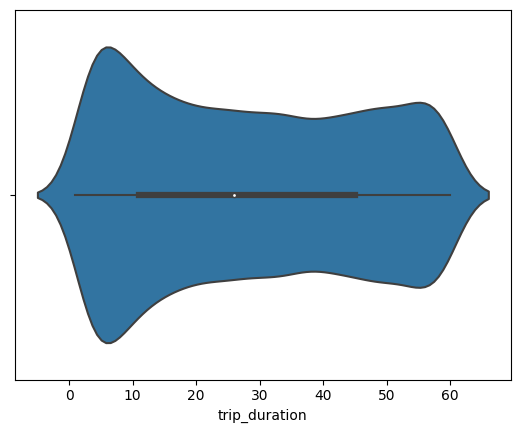

In [30]:
# distribution of target columns when trip_duration is less than 1 minutes
sns.violinplot(x=train_df['trip_duration'].loc[train_df['trip_duration']<=60],)
plt.show()

- through this voiline plot we figured out. the median part of violin plot is wider among other parts. means that significant number of trip    duration around its central value(30 sec). with fewer trips at the very low(0-10 sec) and higher(50-60 sec)

In [31]:
train_df[train_df['trip_duration']==1].shape[0]

33

### conversion of trip_duration into minutes

In [32]:
trip_columns_in_mins = train_df['trip_duration']/60
trip_columns_in_mins.describe().reset_index()

,index,trip_duration
0,count,1.458644e+06
1,mean,1.599154e+01
2,std,8.729053e+01
3,min,1.666667e-02
4,25%,6.616667e+00
5,50%,1.103333e+01
6,75%,1.791667e+01
7,max,5.877137e+04


**key points**
 - mean = 16 mins and median = 11 mins. mean>median => right skewed 
 - 75th percentile value is 18mins
 - the min value is 0 to 1 sec
 - the max value is  16.4 hrs (58771 mins)

### KDE PLOT 
**(Non-Parametric Density Estimation)**

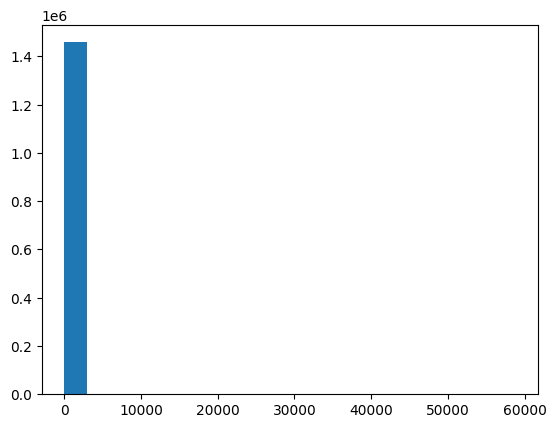

In [33]:
plt.hist(trip_columns_in_mins, bins=20)
plt.show()

In [34]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=5, kernel='gaussian')
sample = np.array(trip_columns_in_mins).reshape((len(trip_columns_in_mins), 1))
model.fit(sample)

KernelDensity(bandwidth=5)

In [35]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape((len(values), 1))

prob_dense = model.score_samples(values)
prob_dense = np.exp(prob_dense)

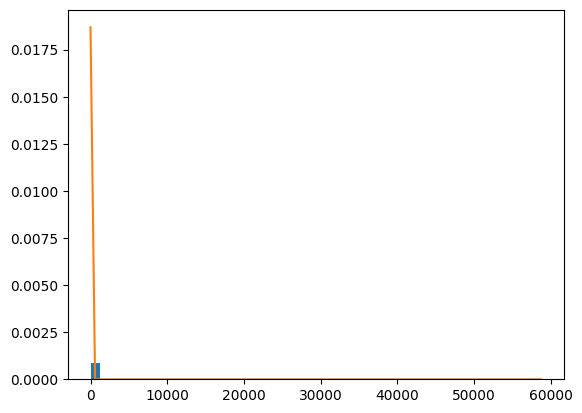

In [36]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], prob_dense)
plt.show()

### using seaborn

<Axes: xlabel='trip_duration', ylabel='Density'>

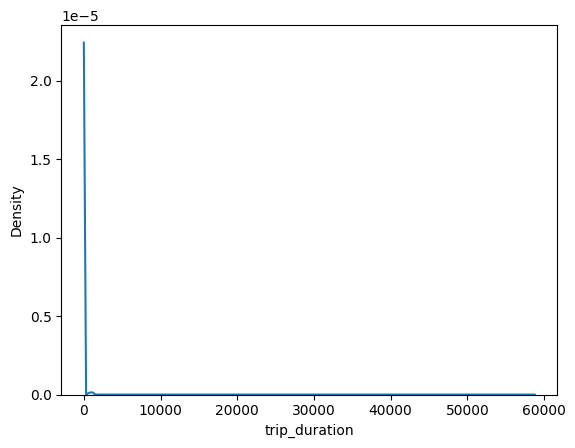

In [37]:
sns.kdeplot(trip_columns_in_mins)

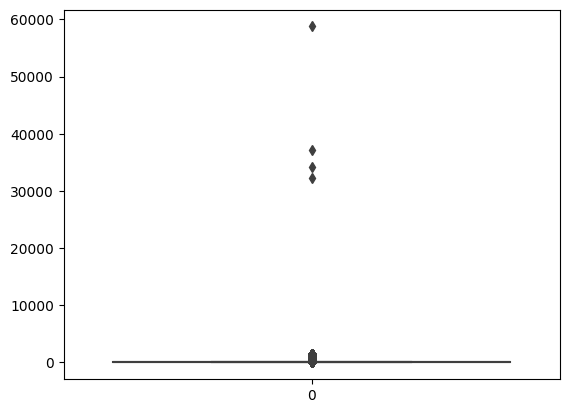

In [38]:
# box plot
sns.boxplot(trip_columns_in_mins)
plt.show()

In [39]:
# looking the extreme points in complete data
train_df[trip_columns_in_mins>5000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


In [40]:
trip_columns_in_mins.drop(index=trip_columns_in_mins[trip_columns_in_mins>5000].index, inplace=True)

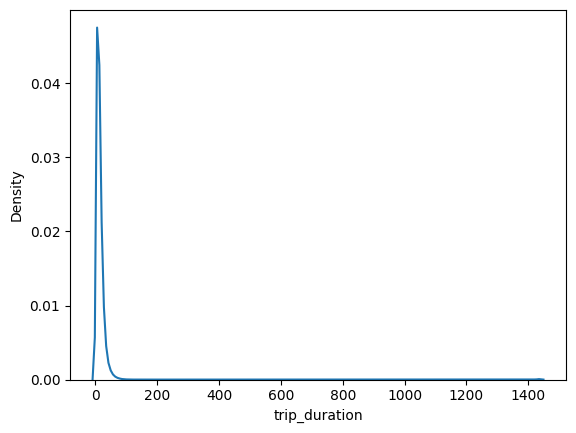

In [41]:
sns.kdeplot(trip_columns_in_mins)
plt.show()

In [42]:
trip_columns_in_mins.skew()

25.268663357003813

In [43]:
trip_columns_in_mins.describe().reset_index()

,index,trip_duration
0,count,1.458640e+06
1,mean,1.588025e+01
2,std,5.285537e+01
3,min,1.666667e-02
4,25%,6.616667e+00
5,50%,1.103333e+01
6,75%,1.791667e+01
7,max,1.439867e+03


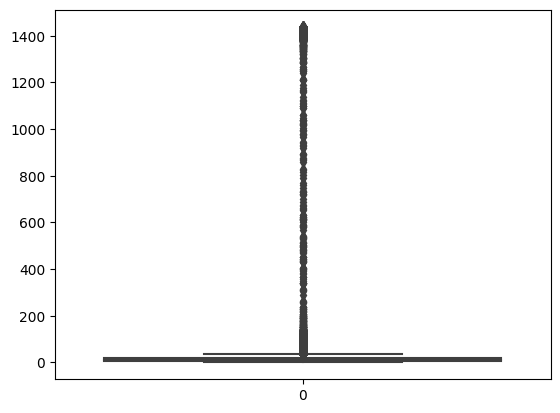

In [44]:
sns.boxplot(trip_columns_in_mins)
plt.show()

### conversion of trip_duration(in hours)

In [45]:
target_hrs = train_df['trip_duration']/3600

<Axes: xlabel='trip_duration', ylabel='Density'>

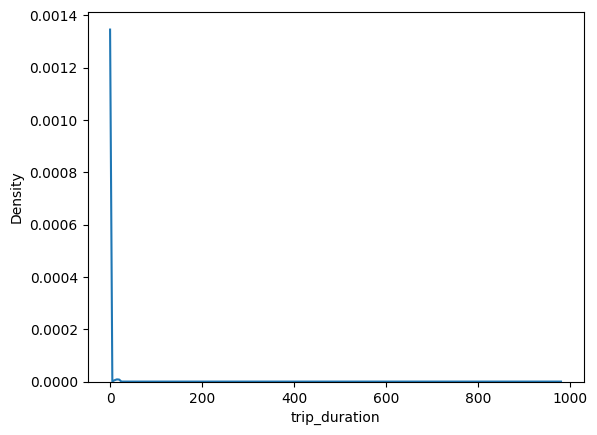

In [46]:
# kde plot
sns.kdeplot(target_hrs)

<Axes: >

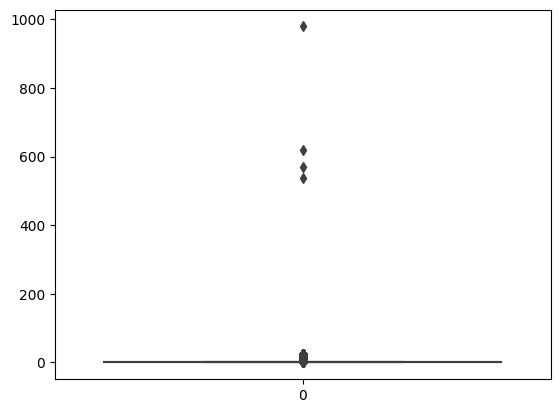

In [47]:
sns.boxplot(target_hrs)

In [48]:
# calculating the upper limit using IQR

Q1_target, Q3_target = target_hrs.quantile([0.25, 0.75])

IQR = Q3_target - Q1_target
print(f'Q1={Q1_target*60:.2f} minutes     ', f'Q3={Q3_target*60:.2f} minutes')
print(f'IQR={IQR*60:.2f} minutes')

upper_bound = Q3_target + (1.5 * IQR)
print(f'Upper Bound={upper_bound*60:.2f} minutes')

Q1=6.62 minutes      Q3=17.92 minutes
IQR=11.30 minutes
Upper Bound=34.87 minutes


In [49]:
X_temp = train_df[train_df['trip_duration']/3600>upper_bound].copy()
X_temp['trip_duration'] = X_temp['trip_duration']/3600

In [50]:
X_temp.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000
16,id3379579,2,2016-04-11 17:29:50,2016-04-11 18:08:26,1,-73.991165,40.755562,-73.999290,40.725353,N,0.643333
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,0.690278
29,id1410897,1,2016-03-23 14:10:39,2016-03-23 14:49:30,1,-73.982117,40.756351,-73.865692,40.770988,N,0.647500
33,id0023813,1,2016-04-17 14:38:30,2016-04-17 15:16:19,1,-73.990311,40.756580,-73.870918,40.773930,N,0.630278


In [51]:
X_temp['trip_duration'].max()

979.5227777777778

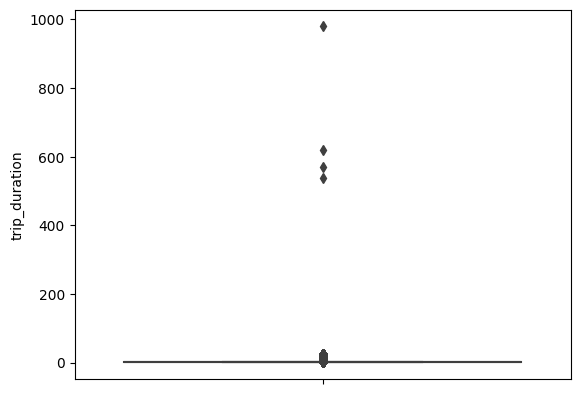

In [52]:
sns.boxplot(data=X_temp, y='trip_duration')
plt.show()

In [53]:
drop_indices = X_temp[X_temp['trip_duration']>100].index
X_temp.drop(index=drop_indices, inplace=True)

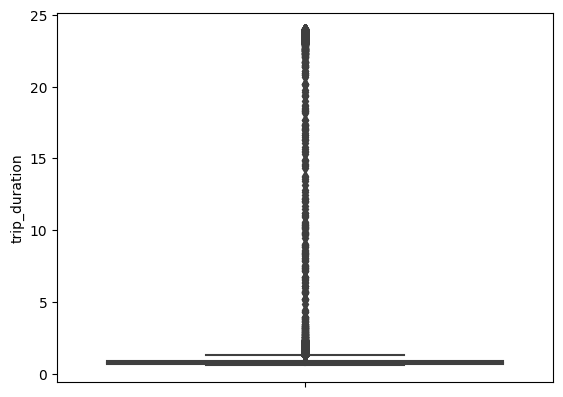

In [54]:
sns.boxplot(data=X_temp, y='trip_duration')
plt.show()

# **2. Longitude And Latitude**

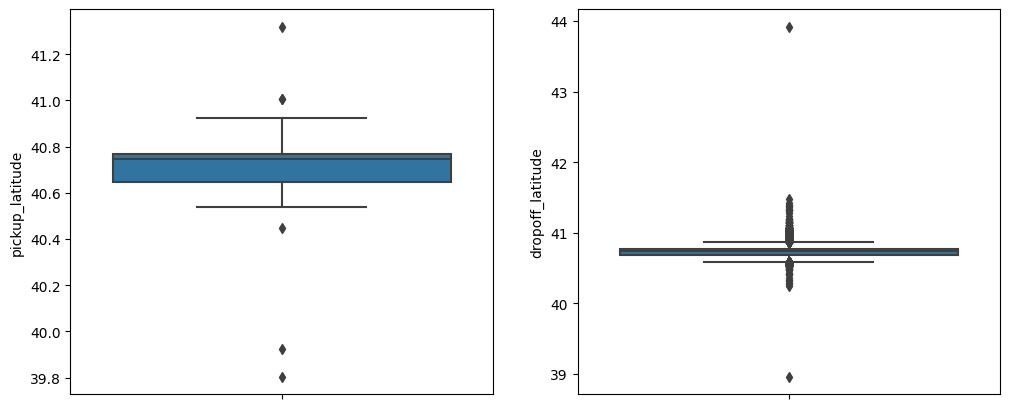

In [55]:
# boxplot for latitudes

fig = plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_temp, y='pickup_latitude')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_temp, y='dropoff_latitude')
plt.show()

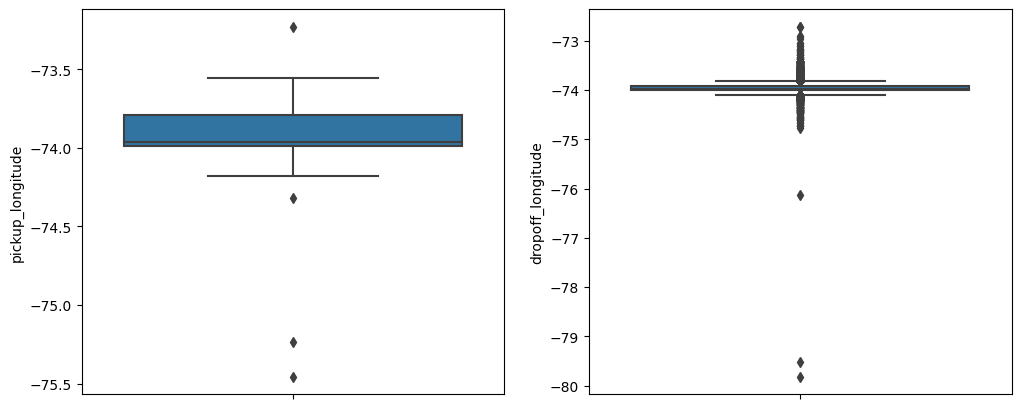

In [56]:
# boxplot for longitudes

fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_temp, y='pickup_longitude')
plt.subplot(1,2,2)
sns.boxplot(data=X_temp, y='dropoff_longitude')
plt.show()

In [57]:
def detect_outliers(data, columns, fold=1.5):
    data_temp = data.copy()
    new_df = pd.DataFrame(columns=columns)
    for col in columns:
        Q1, Q3 = data_temp[col].quantile([0.25, 0.75])
        IQR = Q3-Q1
        upper_bound = Q3 + (fold*IQR)
        lower_bound = Q1 - (fold*IQR)
        filter_data = data_temp.loc[(data_temp[col]<=lower_bound) | (data_temp[col]>=upper_bound)]
        new_df = filter_data
    return new_df

In [58]:
detect_outliers(X_temp, ['pickup_latitude'])

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
66344,id0240882,1,2016-03-11 11:09:48,2016-03-11 12:36:54,1,-73.688805,41.006001,-74.005753,40.725510,N,1.451667
73414,id0098463,1,2016-03-30 19:32:16,2016-03-30 20:25:26,2,-74.126724,41.319164,-73.935120,40.829666,N,0.886111
114376,id1311087,1,2016-02-29 12:16:29,2016-02-29 18:47:09,3,-75.455917,39.803932,-73.796021,40.707726,N,6.511111
981237,id2004335,2,2016-05-02 23:45:19,2016-05-03 00:48:37,1,-74.317749,40.446159,-73.987099,40.723618,N,1.055000
1226891,id2571106,1,2016-01-17 17:10:42,2016-01-17 17:47:33,1,-73.682144,41.003960,-73.913017,40.767632,Y,0.614167
1416336,id3795134,1,2016-03-21 20:54:00,2016-03-22 01:43:23,3,-75.238327,39.923027,-73.922577,40.610130,N,4.823056


In [59]:
detect_outliers(X_temp, ['dropoff_latitude'],3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
115,id2358953,2,2016-06-27 00:31:28,2016-06-27 01:06:44,1,-73.870819,40.773739,-73.857498,41.017811,N,0.587778
991,id1859156,1,2016-02-17 00:54:13,2016-02-17 01:36:27,3,-73.969254,40.754047,-73.593582,41.043865,N,0.703889
14502,id1092161,1,2016-04-15 22:35:08,2016-04-16 00:34:21,1,-73.781792,40.644718,-72.711395,41.311520,N,1.986944
16751,id0633635,1,2016-03-02 13:47:18,2016-03-02 14:53:25,1,-73.994026,40.715553,-73.930740,41.086540,N,1.101944
17802,id3770021,1,2016-02-17 18:59:56,2016-02-17 19:40:11,1,-73.862038,40.764641,-73.542152,41.052258,Y,0.670833
...,...,...,...,...,...,...,...,...,...,...,...
1449228,id2148312,2,2016-04-23 22:44:36,2016-04-23 23:31:57,1,-73.790451,40.646904,-73.837021,41.061226,N,0.789167
1449384,id3101192,1,2016-05-17 20:43:33,2016-05-17 22:13:12,2,-73.979401,40.752388,-73.872871,41.040192,N,1.494167
1450700,id1292498,1,2016-06-23 07:02:07,2016-06-23 08:28:12,1,-73.782013,40.644894,-73.774452,41.031044,N,1.434722
1454301,id1367595,2,2016-04-09 01:38:09,2016-04-09 02:14:52,1,-74.047142,40.789986,-74.010872,41.112366,N,0.611944


# **3. passenger_count**

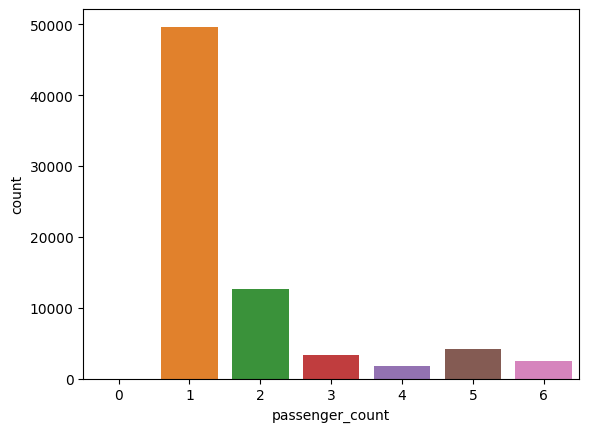

In [60]:
# distribution of passenger_count
sns.countplot(data=X_temp, x='passenger_count')
plt.show()

In [61]:
# trip where passenger count was 0
X_temp[X_temp['passenger_count']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,23.861389
217765,id3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,0.625278
676906,id0878599,1,2016-01-25 08:46:58,2016-01-25 09:41:01,0,-73.928078,40.736412,-73.985519,40.758972,N,0.900833
1257574,id1205792,1,2016-03-11 12:33:17,2016-03-11 13:09:48,0,-73.982063,40.763798,-74.188072,40.694042,N,0.608611


In [62]:
# passenger count and vendor_id
pd.crosstab(index=X_temp['passenger_count'], columns=X_temp['vendor_id'], normalize='columns')*100

vendor_id,1,2
passenger_count,,
0,0.009223,0.002399
1,72.649021,62.422338
2,19.677826,15.067047
3,4.595899,4.421043
4,2.914323,2.010219
5,0.104522,10.051095
6,0.049187,6.025859


In [63]:
# trip durations summary
X_temp.pivot_table(index='passenger_count', columns='vendor_id', values='trip_duration',aggfunc=['min','max', 'median', 'mean'])

min                   max               median  \
vendor_id               1          2          1          2         1   
passenger_count                                                        
0                0.608611  23.861389   0.900833  23.861389  0.625278   
1                0.581389   0.581389  14.548889  23.997500  0.715278   
2                0.581389   0.581389   3.393889  23.997778  0.738611   
3                0.581389   0.581389   6.511111  23.990278  0.737222   
4                0.581389   0.582222   2.756111  23.994167  0.762778   
5                0.592222   0.581389   3.198056  23.993889  0.789167   
6                0.613056   0.581389   1.289722  23.993611  0.775139   

                                mean             
vendor_id                2         1          2  
passenger_count                                  
0                23.861389  0.711574  23.861389  
1                 0.737778  0.785198   1.849816  
2                 0.746111  0.806634   1.872925  
3                 0.730556  0.815239   2.195668  
4                 0.741944  0.825782   2.307446  
5                 0.733194  0.910417   1.925607  
6                 0.739583  0.849201   1.964516

- for `passenger_count=0`, the minimum trip duration is significantly higher for both vendors compared to other passenger count. this could indicates outliers or special cases where trip duration with passenger were unusually long.
- for `passenger_count=5 and 6`, the median trip duration as slightly higher compare to lower passenger_count. this might suggest that trip with more passenger take mored duration.possibly due to logistical reasons like loading/unloading.
- vendor 2's trip are slightly longer on average, compare to vendor 1. this might suggest for longer trip people prefer vendor 2 as compared to vendor 1

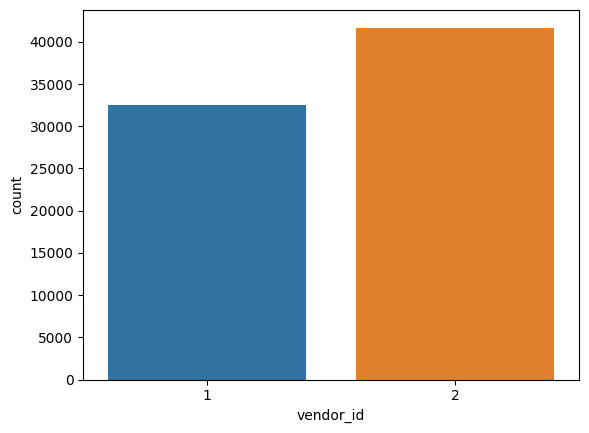

In [64]:
# distribution of passenger count on the basis of vendor id
sns.countplot(data=X_temp, x='vendor_id')
plt.show()

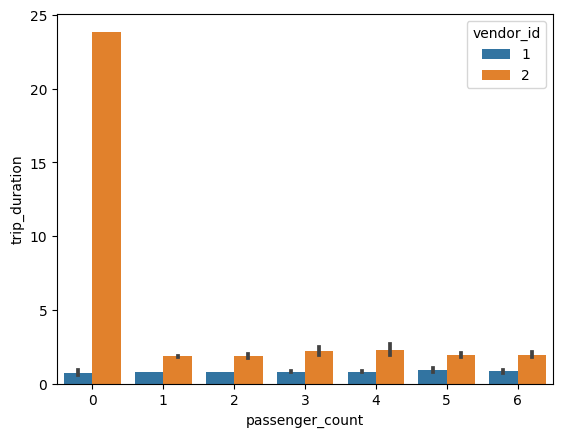

In [65]:
# avg trip duration based on passenger count
sns.barplot(data=X_temp, x='passenger_count', y='trip_duration',hue='vendor_id')
plt.show()

- `Vendor 2` has a significantly higher average trip duration when there are 0 passengers compared to `Vendor 1`. This anomaly suggests there might be a data issue or special cases where the trip duration is unusually long for `Vendor 2` when no passengers are recorded.

- Aside from the outlier for `passenger_count = 0`, both vendors follow a similar pattern where the trip duration slightly increases as the number of passengers increases, but the differences between vendors are minimal.

- The small error terms (as indicated by the short error bars) across the plot suggest high consistency in trip durations within each passenger count category for both vendors. This consistency indicates that the observed differences in average trip duration are likely meaningful and not due to random variation.

In [66]:
# aggregate stats
trip_columns_in_mins.agg(func=['mean','median','min','max'])

mean        15.880254
median      11.033333
min          0.016667
max       1439.866667
Name: trip_duration, dtype: float64

The value for percentile=90.00 : 27.23 minutes
The value for percentile=91.00 : 28.38 minutes
The value for percentile=92.00 : 29.67 minutes
The value for percentile=93.00 : 31.15 minutes
The value for percentile=94.00 : 32.92 minutes
The value for percentile=95.00 : 35.07 minutes
The value for percentile=96.00 : 37.88 minutes
The value for percentile=97.00 : 41.62 minutes
The value for percentile=98.00 : 47.15 minutes
The value for percentile=99.00 : 57.33 minutes


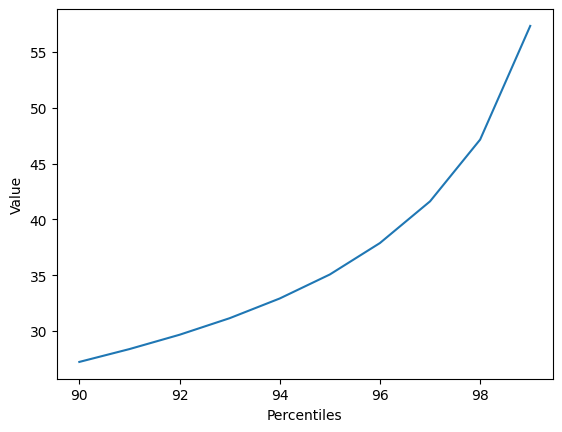

In [67]:
# to understanding the distribution of data print percentile values in data
percentiles = np.arange(0.9, 1.0, 0.01)
res_list = []
for quant in percentiles:
    res = trip_columns_in_mins.quantile(quant)
    res_list.append(res)
    print(f'The value for percentile={quant*100:.2f} : {res:.2f} minutes')

plt.plot(percentiles*100, res_list)
plt.xlabel('Percentiles')
plt.ylabel('Value')
plt.show()

The value for percentile=99.00 : 57.33
The value for percentile=99.10 : 59.00
The value for percentile=99.20 : 60.87
The value for percentile=99.30 : 63.03
The value for percentile=99.40 : 65.69
The value for percentile=99.50 : 68.98
The value for percentile=99.60 : 73.37
The value for percentile=99.70 : 79.38
The value for percentile=99.80 : 92.48
The value for percentile=99.90 : 1418.67
The value for percentile=100.00 : 1439.87


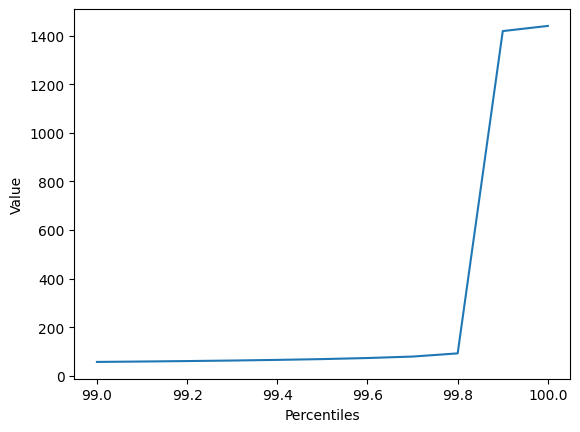

In [68]:
# print percentile finer than above to know the distribution of data
percentiles = np.arange(0.99, 1, 0.001)
res_list = []

for quant in percentiles:
    res = trip_columns_in_mins.quantile(quant)
    res_list.append(res)
    print(f'The value for percentile={quant*100 :.2f} : {res :.2f}')

plt.plot(percentiles*100, res_list)
plt.xlabel('Percentiles')
plt.ylabel('Value')
plt.show()

The value for percentile=99.80 : 92.48
The value for percentile=99.81 : 95.13
The value for percentile=99.82 : 98.25
The value for percentile=99.83 : 103.02
The value for percentile=99.84 : 110.31
The value for percentile=99.85 : 133.00
The value for percentile=99.86 : 436.64
The value for percentile=99.87 : 1331.58
The value for percentile=99.88 : 1390.89
The value for percentile=99.89 : 1409.11
The value for percentile=99.90 : 1418.67
The value for percentile=99.91 : 1424.39
The value for percentile=99.92 : 1428.08
The value for percentile=99.93 : 1431.05
The value for percentile=99.94 : 1433.45
The value for percentile=99.95 : 1435.03
The value for percentile=99.96 : 1436.29
The value for percentile=99.97 : 1437.38
The value for percentile=99.98 : 1438.14
The value for percentile=99.99 : 1438.75
The value for percentile=100.00 : 1439.87


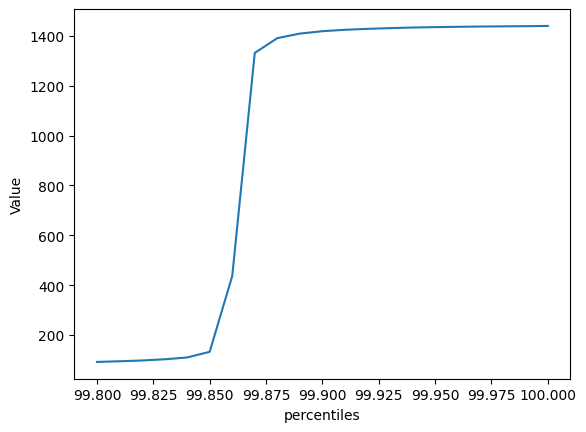

In [69]:
# print percentile more finer than above to know the distribution of data
percentiles = np.arange(0.998, 1, 0.0001)
res_list = []
for quant in percentiles:
    res = trip_columns_in_mins.quantile(quant)
    res_list.append(res)
    print(f'The value for percentile={quant*100:.2f} : {res:.2f}')
    
plt.plot(percentiles*100, res_list)
plt.xlabel('percentiles')
plt.ylabel('Value')
plt.show()

- At the point where sudden change occure are the outlier point. they can be responsible for overfitting of data. 

In [70]:
trip_columns_in_mins

0           7.583333
1          11.050000
2          35.400000
3           7.150000
4           7.250000
             ...    
1458639    12.966667
1458640    10.916667
1458641    12.733333
1458642     6.216667
1458643     3.300000
Name: trip_duration, Length: 1458640, dtype: float64

In [71]:
# number of data points above or equal to the 100 minutes mark

time_ranges = np.arange(100, 1500, 100)
prev_val = 0
for time in time_ranges:
    new_val = trip_columns_in_mins[trip_columns_in_mins>time].size
    print(f'{time} = {new_val}        diff={np.abs(new_val-prev_val)}')
    prev_val = new_val

100 = 2563        diff=2563
200 = 2092        diff=471
300 = 2068        diff=24
400 = 2049        diff=19
500 = 2028        diff=21
600 = 2008        diff=20
700 = 1991        diff=17
800 = 1980        diff=11
900 = 1969        diff=11
1000 = 1957        diff=12
1100 = 1940        diff=17
1200 = 1929        diff=11
1300 = 1909        diff=20
1400 = 1701        diff=208


In [72]:
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [73]:
normal_duration_df = train_df[(train_df['trip_duration']/60)<100].copy()
normal_duration_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [74]:
# total number of rows where trip duration is higher than 100 minutes
(trip_columns_in_mins>100).sum()

2563

- we have only 2563 rows out of 1.4 million rows as outliers. so we remove this. becoze 2563 is much smaller than 1.4 million 

In [75]:
!mkdir /kaggle/working/data-without-outliers

In [76]:
df_path = ('/kaggle/working/data-without-outliers/train.csv')
normal_duration_df.to_csv(df_path)

In [77]:
df = pd.read_csv('/kaggle/working/data-without-outliers/train.csv')
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [78]:
# dropoff and pickup of point where trip_duration is above 100minutes
extreme_time_duration =train_df.loc[train_df['trip_duration']/60>=100]
extreme_time_duration.shape

(2567, 11)

In [79]:
# boarder of nyc
latitude_coord = train_df['pickup_latitude'].quantile([0.01, 0.99]).sort_values(ascending=False).values+np.array([0.05, -0.05])
longitude_coord = train_df['pickup_longitude'].quantile([0.01, 0.99]).sort_values(ascending=False).values+np.array([0.1, -0.1])

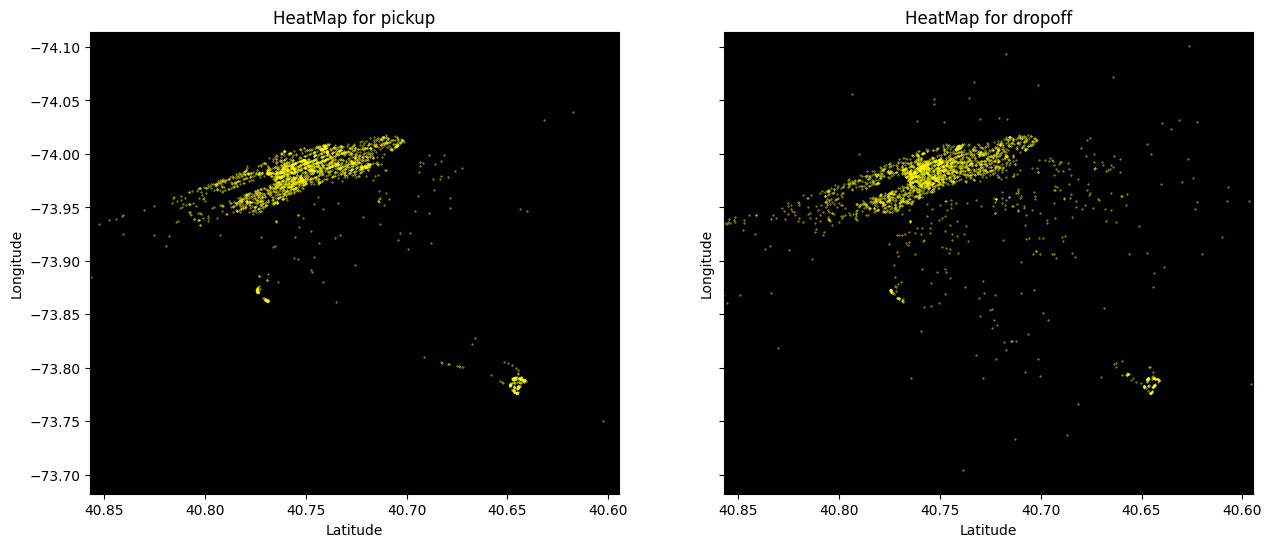

In [80]:
# heatmap of pickup and dropoff where trip duration is greater than 100 minutes

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
ax[0].set_facecolor('k')
ax[0].scatter(extreme_time_duration['pickup_latitude'], extreme_time_duration['pickup_longitude'], s=0.1, color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('HeatMap for pickup')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(extreme_time_duration['dropoff_latitude'], extreme_time_duration['dropoff_longitude'], s=0.1, color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('HeatMap for dropoff')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')
plt.show()

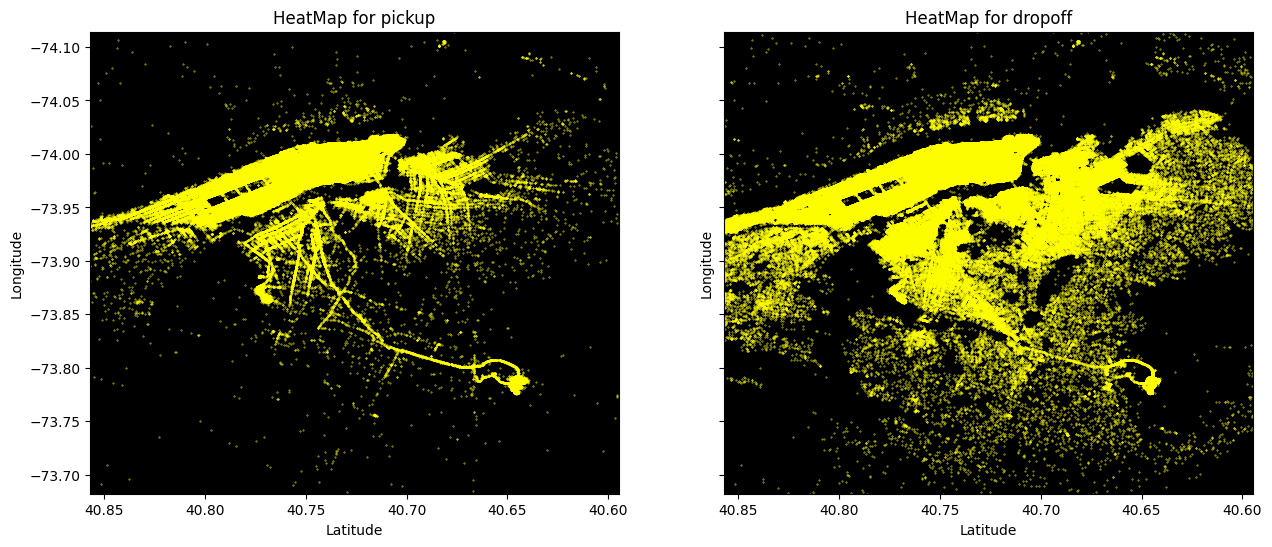

In [81]:
# heatmap of pickup and dropoff where trip duration is greater than 100 minutes

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
ax[0].set_facecolor('k')
ax[0].scatter(normal_duration_df['pickup_latitude'], normal_duration_df['pickup_longitude'], s=0.1, color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('HeatMap for pickup')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(normal_duration_df['dropoff_latitude'], normal_duration_df['dropoff_longitude'], s=0.1, color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('HeatMap for dropoff')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')
plt.show()

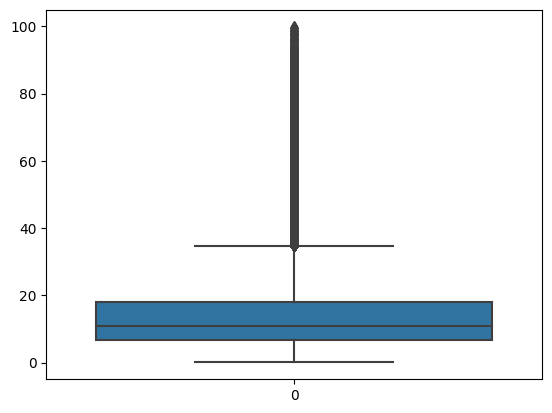

In [82]:
# distribution of tripduration  col when trip_duration<100 minutes
sns.boxplot(trip_columns_in_mins[trip_columns_in_mins<=100])
plt.show()

In [83]:
# passenger counts in datatsets
print(normal_duration_df['passenger_count'].unique())
print(extreme_time_duration['passenger_count'].unique())

[1 6 4 2 3 5 0 7 9 8]
[1 3 6 2 5 4 0]


In [84]:
normal_duration_df['trip_duration'] = normal_duration_df['trip_duration']/60
extreme_time_duration['trip_duration'] = extreme_time_duration['trip_duration']/60

In [85]:
normal_duration_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,7.250000


# **Bivariate Analysis**

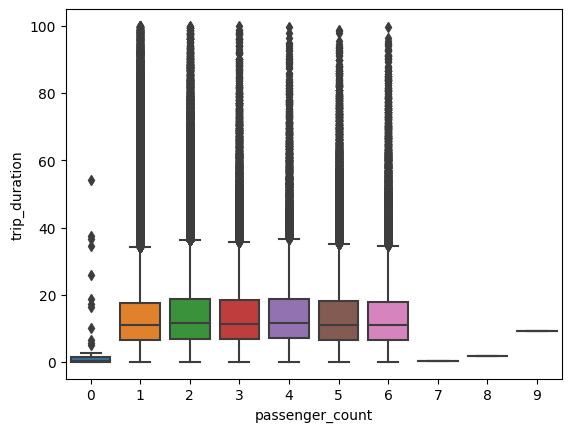

In [86]:
# Box plot based on the trip_duration and passenger_count

sns.boxplot(normal_duration_df, x='passenger_count', y='trip_duration')
plt.show()

- As the `passenger_count` increases, the `trip_duration` tends to increase as well. this suggest a potential positive correlation b/w `passenger_count` and `trip_duration`

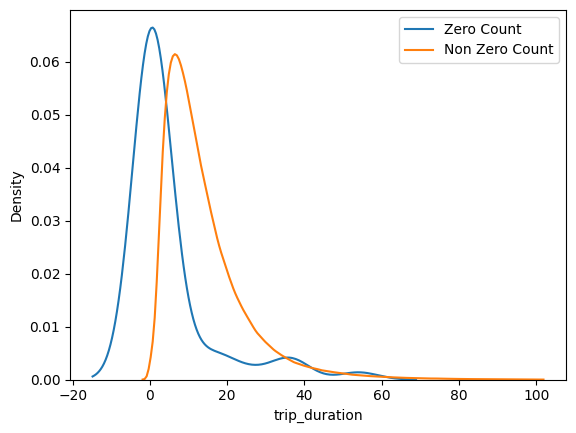

In [87]:
# distribution of trip durations for two groups: rides with zero passengers and rides with non-zero passengers
sns.kdeplot(data=normal_duration_df.loc[normal_duration_df['passenger_count']==0], x='trip_duration', label='Zero Count')
sns.kdeplot(data=normal_duration_df.loc[normal_duration_df['passenger_count']!=0], x='trip_duration', label='Non Zero Count')
plt.legend()
plt.show()

In [88]:
normal_duration_df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,11.050000


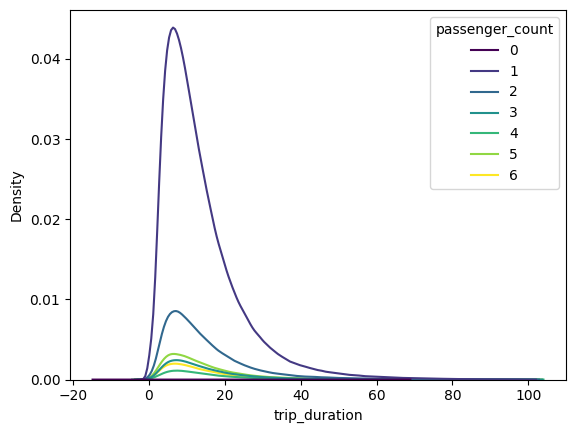

In [89]:
# distribution of trip_duration for each passenger_count
passenger_count_range = list(range(0, 7))
sns.kdeplot(data=normal_duration_df[normal_duration_df['passenger_count'].isin(passenger_count_range)],
           x='trip_duration', hue='passenger_count', palette='viridis')
plt.show()

- As the number of passenger increases the peak shifter toward right. this indicates trips longer with more passengers 
- spread of distribution curve increases as the number of passengers increases. with 0 or 1 passenger count narrower the distribution is becoze indicating less variabily in duration.while others(3,4,5,6) exhibit wider distribution, suggesting more diverse trip durations.

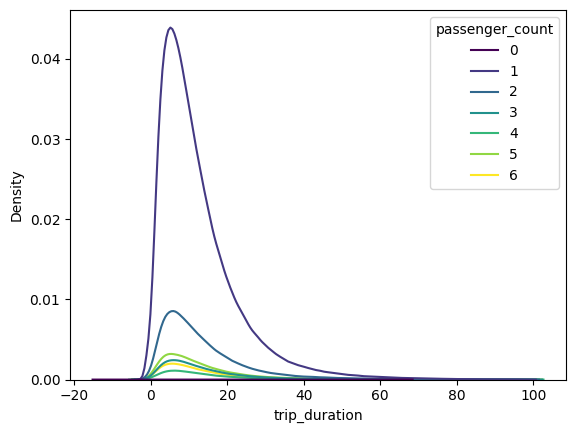

In [90]:
# distribution of trip_duration for each passenger_count after standarization
passenger_count_grp = normal_duration_df.groupby('passenger_count')

temp_df = pd.DataFrame()
temp_df['passenger_count'] = normal_duration_df['passenger_count'].copy()
temp_df['trip_duration'] = passenger_count_grp['trip_duration'].transform(lambda x: (x-x.mean()/x.std()))

sns.kdeplot(data=temp_df[temp_df['passenger_count'].isin(passenger_count_range)], x='trip_duration', hue='passenger_count', palette='viridis')
plt.show()


- Nothing would change after applying standarization

In [91]:
normal_duration_df['trip_duration'].skew()

2.1161167221274226

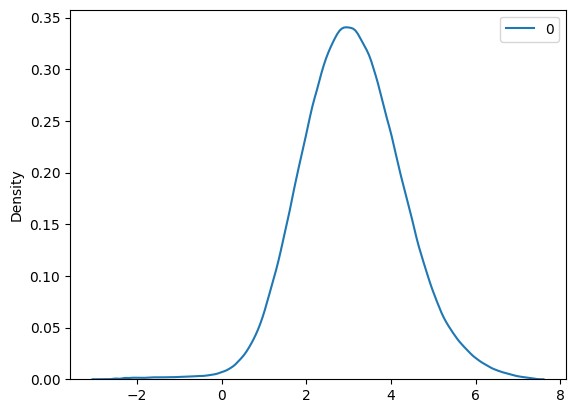

In [92]:
# apply box-cox transformation
from sklearn.preprocessing import PowerTransformer
pt_target = PowerTransformer(method='box-cox', standardize=False)

trip_duration = pt_target.fit_transform(normal_duration_df[['trip_duration']])
sns.kdeplot(trip_duration)
plt.show()

In [93]:
pd.DataFrame(trip_duration).skew() # => look like normal distribution

0    0.033875
dtype: float64

# **4. id**

In [94]:
train_df.id

0          id2875421
1          id2377394
2          id3858529
3          id3504673
4          id2181028
             ...    
1458639    id2376096
1458640    id1049543
1458641    id2304944
1458642    id2714485
1458643    id1209952
Name: id, Length: 1458644, dtype: object

In [95]:
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [96]:
# remove id from each id column and convert its datatype into int
def remove_id_and_cvtDtypes(data):
    data['id'] = data['id'].str.replace('id', '')
    return data['id'].astype('int')

In [97]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [98]:
train_df['id'] = remove_id_and_cvtDtypes(train_df)
test_df['id'] = remove_id_and_cvtDtypes(test_df)

In [99]:
# test if id column is required
def id_required(data):
    if data.shape[0] == data['id'].nunique():
        new_data = data.drop(columns='id')
        return new_data
    else:
        return data
    


In [100]:
new_train_df=id_required(train_df)

In [101]:
new_test_df=id_required(test_df)

In [102]:
new_train_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# **5. vendor_id**

In [103]:
# categories in the vendor id column
new_train_df['vendor_id']

0          2
1          1
2          2
3          2
4          2
          ..
1458639    2
1458640    1
1458641    2
1458642    1
1458643    1
Name: vendor_id, Length: 1458644, dtype: int64

In [104]:
new_train_df['vendor_id'].value_counts()

vendor_id
2    780302
1    678342
Name: count, dtype: int64

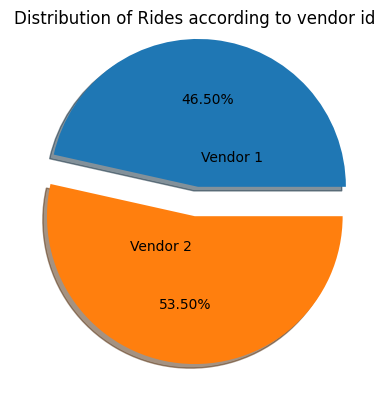

In [105]:
# checking the data is imbalance or not through pie chart
labels = ['Vendor 1', 'Vendor 2']
plt.pie(new_train_df['vendor_id'].value_counts().sort_index(), shadow=True, autopct='%.2f%%',explode=[0.2,0.0], labels=labels, labeldistance=0.2)
plt.title('Distribution of Rides according to vendor id')
plt.show()

- this is the balanced data
- but people wanna want to go on trips with vendor2 car

# **6. pickup datetime**

In [106]:
# changing the datatype
new_train_df.dtypes

vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [107]:
new_train_df['pickup_datetime']= pd.to_datetime(new_train_df['pickup_datetime'])
new_test_df['pickup_datetime']=pd.to_datetime(new_test_df['pickup_datetime'])

In [108]:
new_train_df['pickup_datetime'].dt.weekday

0          0
1          6
2          1
3          2
4          5
          ..
1458639    4
1458640    6
1458641    4
1458642    1
1458643    1
Name: pickup_datetime, Length: 1458644, dtype: int32

  ### **Feature extraction**

In [109]:
def new_dt_features(data, column):
    data[f'{column}_hour'] = data[f'{column}_datetime'].dt.hour
    data[f'{column}_date'] = data[f'{column}_datetime'].dt.day
    data[f'{column}_month']= data[f'{column}_datetime'].dt.month
    data[f'{column}_day'] = data[f'{column}_datetime'].dt.weekday
    data[f'is_weekend'] = data.apply(lambda x: x[f'{column}_day']>=5, axis=1).astype('int')
    return data

In [110]:
new_dt_features(new_train_df, 'pickup')
new_dt_features(new_test_df, 'pickup')

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_date,pickup_month,pickup_day,is_weekend
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23,30,6,3,0
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23,30,6,3,0
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23,30,6,3,0
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23,30,6,3,0
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23,30,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,0,1,1,4,0
625130,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,0,1,1,4,0
625131,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,0,1,1,4,0
625132,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,0,1,1,4,0


In [111]:
new_train_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_date,pickup_month,pickup_day,is_weekend
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,14,3,0,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,12,6,6,1
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,1,0
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,6,4,2,0
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,26,3,5,1


In [112]:
# save the data and make the directory as datetime
save_path = Path('/kaggle/working')/'datetime'
save_path.mkdir(parents=True, exist_ok=True)

# save path as train file
new_train_df.to_csv(save_path / 'train.csv')

# save path as test file
new_test_df.to_csv(save_path / 'test.csv')

## **EDA on the Datetime Columns**

In [113]:
# time range for train data
new_train_df['pickup_datetime'].max()-new_train_df['pickup_datetime'].min()

Timedelta('181 days 23:59:22')

In [114]:
new_test_df['pickup_datetime'].max()-new_test_df['pickup_datetime'].min()

Timedelta('181 days 23:59:36')

- range of train and test data is same and it's 6 month

In [115]:
# time range for train and test data as dataframe
data_temp = {'opening_date': [new_train_df['pickup_datetime'].min(), new_test_df['pickup_datetime'].min()],
            'closing_date' : [new_train_df['pickup_datetime'].max(), new_test_df['pickup_datetime'].max()]}

In [116]:
pd.DataFrame(data=data_temp, index=['train', 'test']).T

,train,test
opening_date,2016-01-01 00:00:17,2016-01-01 00:00:22
closing_date,2016-06-30 23:59:39,2016-06-30 23:59:58


- This shows that both the train and the test data have ranges from the same dates i.e. from (Jan 1st, 2016) till (June 30th, 2016).

In [117]:
# total pickup each day
new_train_df['pickup_datetime'].dt.date.value_counts().sort_index()

pickup_datetime
2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
              ... 
2016-06-26    7084
2016-06-27    7311
2016-06-28    7253
2016-06-29    7623
2016-06-30    7588
Name: count, Length: 182, dtype: int64

- this is calculated to find the pattern of passengers on particular date in line plots for both the train and test data.

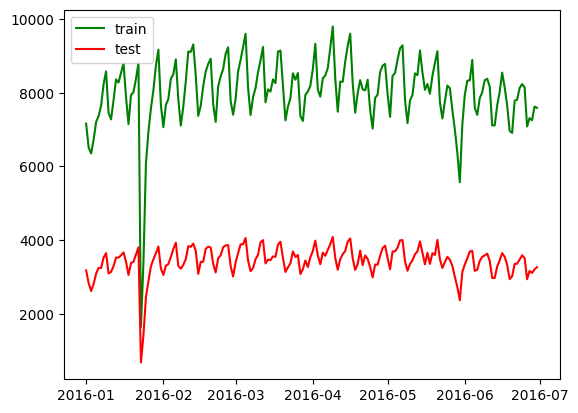

In [118]:
# pickup patterns for train and test data
plt.plot(new_train_df['pickup_datetime'].dt.date.value_counts().sort_index(), color='green', label='train')
plt.plot(new_test_df['pickup_datetime'].dt.date.value_counts().sort_index(), color='red', label='test')
plt.legend()
plt.show()

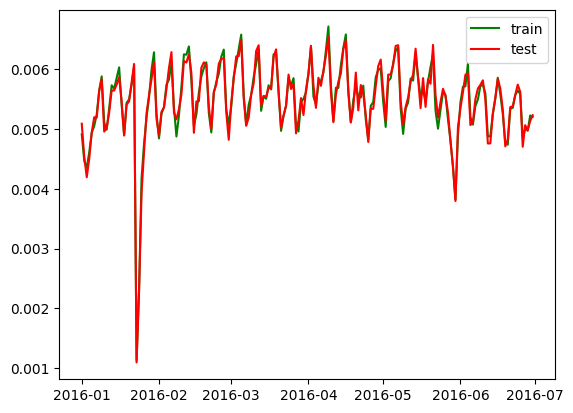

In [119]:
# pickup patterns for train and test data (normalized)
plt.plot(new_train_df['pickup_datetime'].dt.date.value_counts(normalize=True).sort_index(), color='green', label='train')
plt.plot(new_test_df['pickup_datetime'].dt.date.value_counts(normalize=True).sort_index(), color='red', label='test')
plt.legend()
plt.show()

- This graph clearly indicates that the pickup patterns for train and test data are same

**Major Anomaly in the Pickup pattern**

The January 2016 United States blizzard produced up to 3 ft (91 cm) of snow in parts of the Mid-Atlantic and Northeastern United States during January 22–24, 2016

> A travel ban was instituted for New York City and Newark, New Jersey, for January 23–24. The blizzard that walloped New York City in January is officially the biggest snowstorm in the history of the five boroughs, according to a new report prompted by questions about the accuracy of snowfall measurements.

In [120]:
new_train_df['pickup_datetime'].dt.date

0          2016-03-14
1          2016-06-12
2          2016-01-19
3          2016-04-06
4          2016-03-26
              ...    
1458639    2016-04-08
1458640    2016-01-10
1458641    2016-04-22
1458642    2016-01-05
1458643    2016-04-05
Name: pickup_datetime, Length: 1458644, dtype: object

In [121]:
# avg daily pickup
new_train_df['pickup_datetime'].dt.date.value_counts().mean()

8014.527472527472

In [122]:
# avg daily pickup across all month
month_grp = new_train_df.groupby(by='pickup_month')

daily_pickup_mean = month_grp['pickup_date'].value_counts().mean()

In [123]:
daily_pickup_mean

8014.527472527472

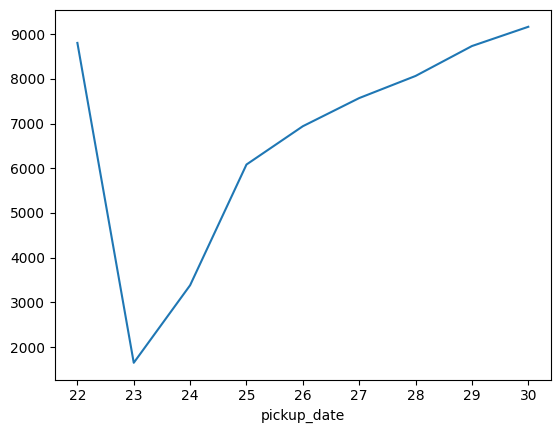

In [124]:
# total trips instead of travel bans
ban_df = new_train_df.loc[(new_train_df['pickup_date'].isin(list(range(22, 31))) & (new_train_df['pickup_month']==1))]
ban_df['pickup_date'].value_counts().sort_index().plot()
plt.show()

- This is happen becoze someone health is not good that's why the trips are need to hospitalize and to reach the travel at the airport. and many more valid resons happened

In [125]:
# total number of days when number of trips that day is less than daily mean
unique_dates = new_train_df['pickup_datetime'].dt.date.value_counts()
days_below_mean = unique_dates[unique_dates<daily_pickup_mean].size
days_below_mean_per=days_below_mean/unique_dates.size
print(f'The number of days where number of pickups is below the daily avg is {days_below_mean} which is {(days_below_mean_per * 100):.2f}% of the total days')


The number of days where number of pickups is below the daily avg is 82 which is 45.05% of the total days


In [126]:
unique_dates = new_train_df['pickup_datetime'].dt.date.value_counts()

In [127]:
unique_dates

pickup_datetime
2016-04-09    9796
2016-04-16    9602
2016-03-05    9597
2016-04-02    9325
2016-02-13    9309
              ... 
2016-01-03    6353
2016-01-25    6084
2016-05-30    5570
2016-01-24    3383
2016-01-23    1648
Name: count, Length: 182, dtype: int64

In [128]:
from IPython.display import HTML

def horizontal(dfs):
    html = '<div style="display:flex">'
    
    for df in dfs:
        html += '<div style="margin-right: 32px">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    
    # converting our html string into actual HTML so that we can display() it
    display(HTML(html))

In [129]:
# dates where the pickups were below average for each month as compared to the daily average

temp_df = unique_dates[unique_dates<daily_pickup_mean].reset_index().sort_values('pickup_datetime')
temp_df['pickup_datetime'] = pd.to_datetime(temp_df['pickup_datetime'])
temp_df['month'] = temp_df['pickup_datetime'].dt.month

dfs_to_display = []

for month in np.sort(new_train_df['pickup_month'].unique()):
    filter_month = temp_df['month']==month
    dfs_to_display.append(temp_df.loc[filter_month, ['pickup_datetime','count']].reset_index(drop=True))

horizontal(dfs_to_display)

,pickup_datetime,count
0,2016-01-01,7162
1,2016-01-02,6512
2,2016-01-03,6353
3,2016-01-04,6725
4,2016-01-05,7204
5,2016-01-06,7365
6,2016-01-07,7649
7,2016-01-10,7454
8,2016-01-11,7276
9,2016-01-12,7794


In [130]:
ban_df['pickup_date'].value_counts().sort_values()



pickup_date
23    1648
24    3383
25    6084
26    6941
27    7571
28    8066
29    8735
22    8805
30    9166
Name: count, dtype: int64

In [131]:
# total trips on ban days
ban_pickups = ban_df['pickup_date'].value_counts().sort_values()
print(f'Number of total Pickup on BAN DAYS are {ban_pickups[[23,24]].sum()}')

Number of total Pickup on BAN DAYS are 5031


In [132]:
ban_pickups

pickup_date
23    1648
24    3383
25    6084
26    6941
27    7571
28    8066
29    8735
22    8805
30    9166
Name: count, dtype: int64

In [133]:
latitude_cord = new_train_df['pickup_latitude'].quantile([0.01, 0.99]).sort_values(ascending=False).values +np.array([0.05, -0.05])
longitude_cord= new_train_df['pickup_longitude'].quantile([0.01, 0.99]).sort_values(ascending=False).values+np.array([0.1, -0.1])

- Here we slightly expands the range by adding and subtracting smaller value.
- latitudinally chages typically have a smaller impact on geographical distance than longitudinal thats why smaller value is added and subtracted in latitude cord compare to longitude coord

In [134]:
longitude_coord

array([-73.68222656, -74.11431709])

In [135]:
latitude_cord

array([40.85659866, 40.59482498])

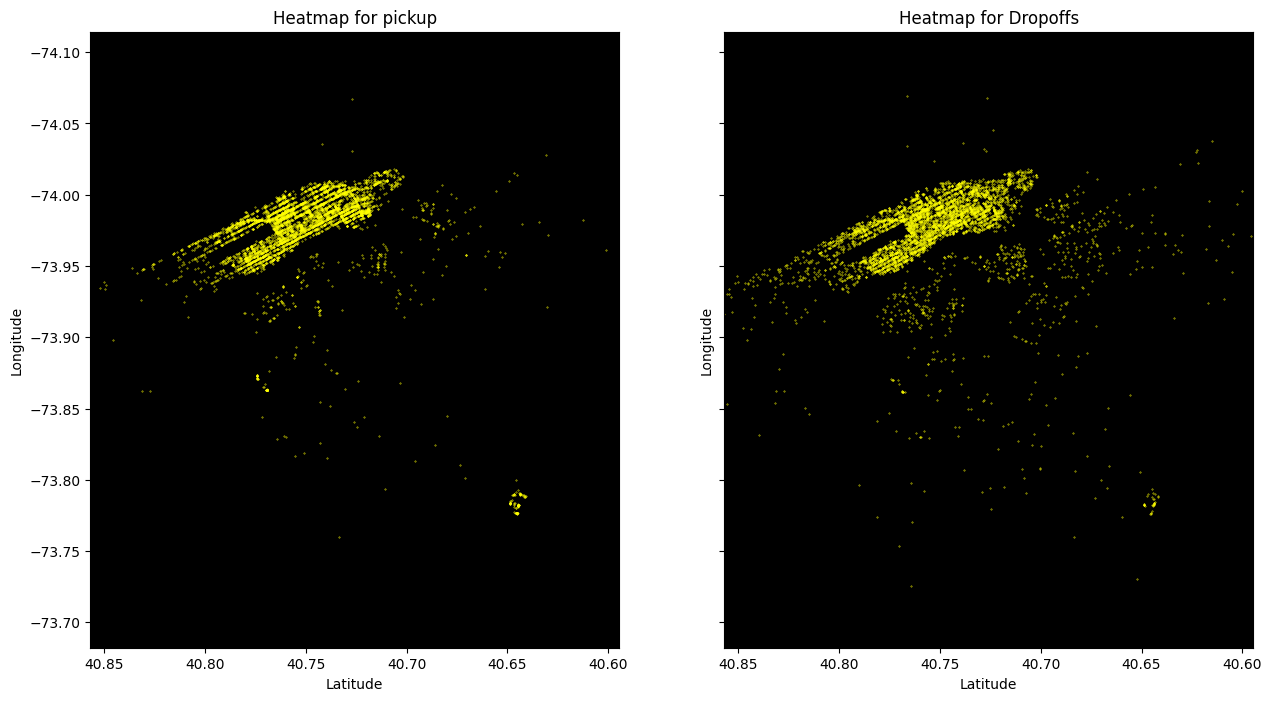

In [136]:
# heatmap of the pickups and dropoffs during the travel ban

ban_df = ban_df.loc[ban_df['pickup_date'].isin([23,24])]

fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

ax[0].set_facecolor('k')
ax[0].scatter(ban_df['pickup_latitude'], ban_df['pickup_longitude'], s=0.1, color='yellow')
ax[0].set_ylim(longitude_cord)
ax[0].set_xlim(latitude_cord)
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')
ax[0].set_title('Heatmap for pickup')


ax[1].set_facecolor('k')
ax[1].scatter(ban_df['dropoff_latitude'],ban_df['dropoff_longitude'],s=0.1,color='yellow')
ax[1].set_ylim(longitude_cord)
ax[1].set_xlim(latitude_cord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

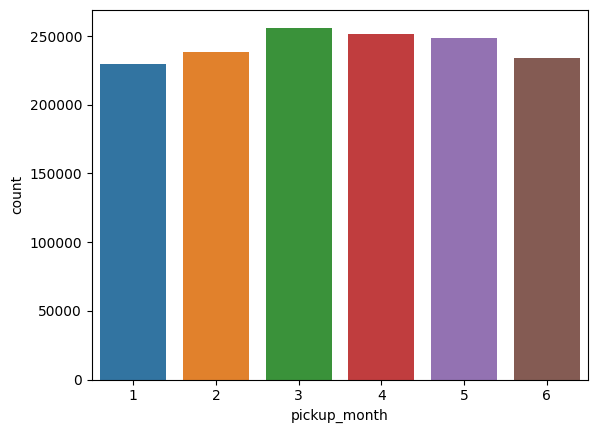

In [137]:
# total pickup in each month 
sns.countplot(data=new_train_df, x='pickup_month')
plt.show()

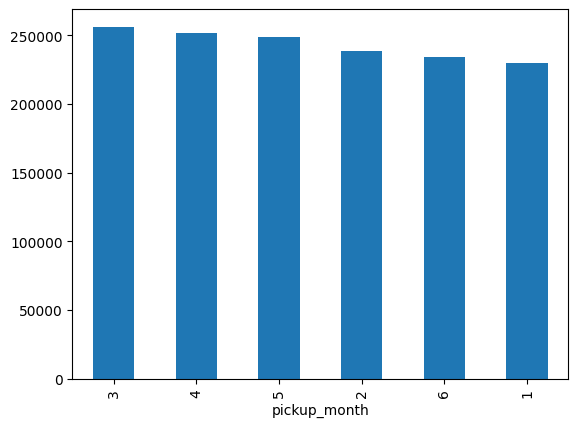

In [138]:
new_train_df['pickup_month'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

- Less number of pickup in month january can be due to snow , heavy blizzards or festive seasons


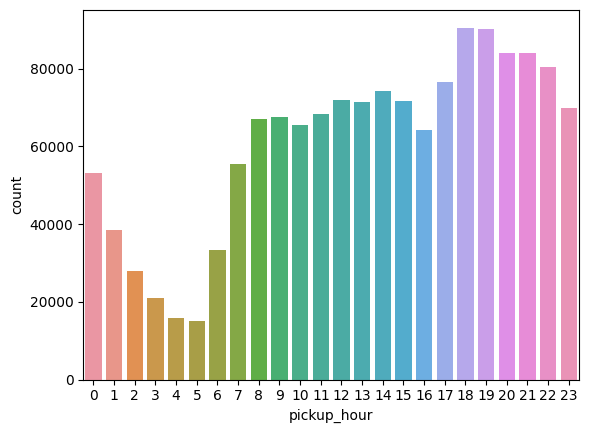

In [139]:
# Rush hour for taxi pickups

sns.countplot(data=new_train_df, x='pickup_hour')
plt.show()

**Things to note**
1. Cab pickup reduce after mid night and pickup pace after daybreak around 6am.
2. Pickup reach peak at 8 pm and then stablize till 3pm
3. Again the pickup gain strength around 6pm till 10pm at night.

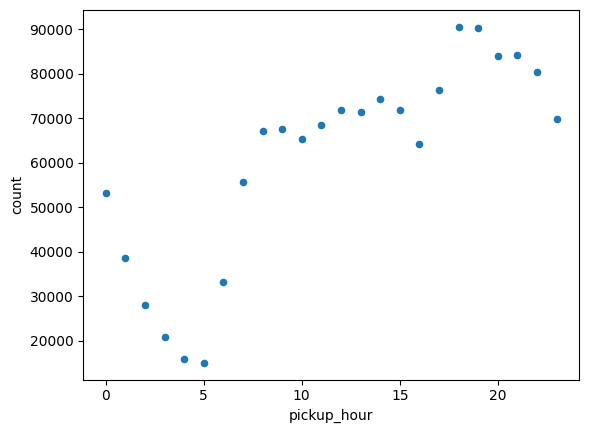

In [140]:
# Rush hour divide into three part through above visualization
# scatter plot

cluster_input = new_train_df['pickup_hour'].value_counts().sort_index().reset_index()
cluster_input.plot(kind='scatter', x='pickup_hour', y='count')
plt.show()

In [141]:
cluster_input

,pickup_hour,count
0,0,53248
1,1,38571
2,2,27972
3,3,20895
4,4,15792
5,5,15002
6,6,33248
7,7,55600
8,8,67053
9,9,67663


**Agglomerative Clustering**

In [142]:
# plotting dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
clustering = linkage(y=cluster_input.values, method='single')
clustering

array([[1.20000000e+01, 1.50000000e+01, 6.20725382e+01, 2.00000000e+00],
       [2.00000000e+01, 2.10000000e+01, 1.13004425e+02, 2.00000000e+00],
       [1.80000000e+01, 1.90000000e+01, 2.92001712e+02, 2.00000000e+00],
       [1.30000000e+01, 2.40000000e+01, 3.38005917e+02, 3.00000000e+00],
       [8.00000000e+00, 9.00000000e+00, 6.10000820e+02, 2.00000000e+00],
       [4.00000000e+00, 5.00000000e+00, 7.90000633e+02, 2.00000000e+00],
       [1.10000000e+01, 2.80000000e+01, 8.13002460e+02, 3.00000000e+00],
       [1.00000000e+01, 1.60000000e+01, 1.12401601e+03, 2.00000000e+00],
       [2.30000000e+01, 3.00000000e+01, 1.30905500e+03, 4.00000000e+00],
       [3.10000000e+01, 3.20000000e+01, 1.61600124e+03, 6.00000000e+00],
       [2.70000000e+01, 3.30000000e+01, 1.68802962e+03, 9.00000000e+00],
       [1.40000000e+01, 1.70000000e+01, 2.19100205e+03, 2.00000000e+00],
       [0.00000000e+00, 7.00000000e+00, 2.35201042e+03, 2.00000000e+00],
       [3.40000000e+01, 3.50000000e+01, 2.41900083e

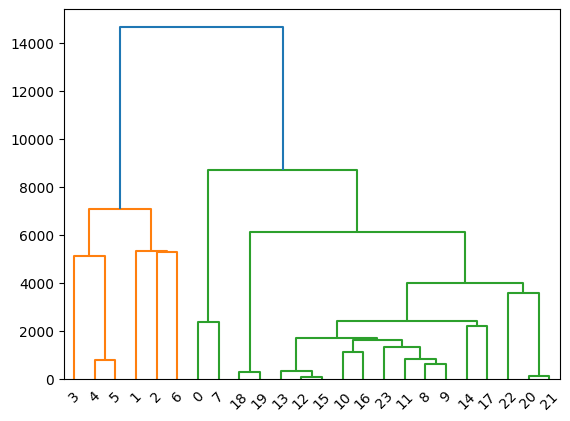

In [143]:
dendrogram(clustering)
plt.show()

- The 2 optimum cluster is suggested by this dendogram

In [144]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
agglo

AgglomerativeClustering(linkage='single', metric='euclidean')

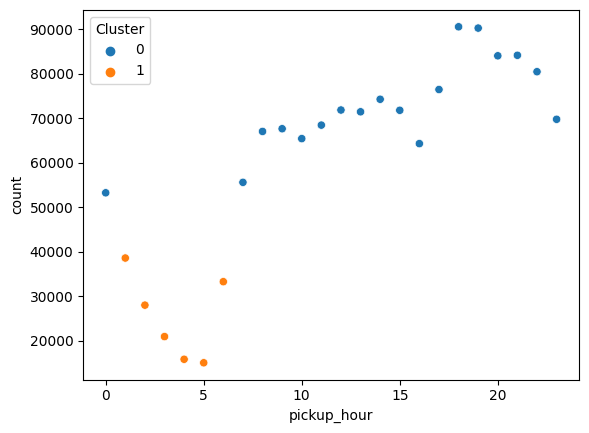

In [145]:
predictions = agglo.fit_predict(cluster_input)

# add the cluster labels to the dataframe
cluster_input['Cluster'] = predictions

sns.scatterplot(data=cluster_input, x='pickup_hour', y='count', hue='Cluster')
plt.show()

### 0 => High Rush Hour
### 1 => Low Rush Hour

In [146]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

- n_init different initialization of centroid for the convergence algorithm runs max_iters

In [147]:
cluster_input.drop(columns='Cluster')

,pickup_hour,count
0,0,53248
1,1,38571
2,2,27972
3,3,20895
4,4,15792
5,5,15002
6,6,33248
7,7,55600
8,8,67053
9,9,67663


The silhouette score for 2 clusters is 0.730999345191349
The silhouette score for 3 clusters is 0.6041879661763571
The silhouette score for 4 clusters is 0.6015263923663414
The silhouette score for 5 clusters is 0.643595821659998
The silhouette score for 6 clusters is 0.5882506033083935


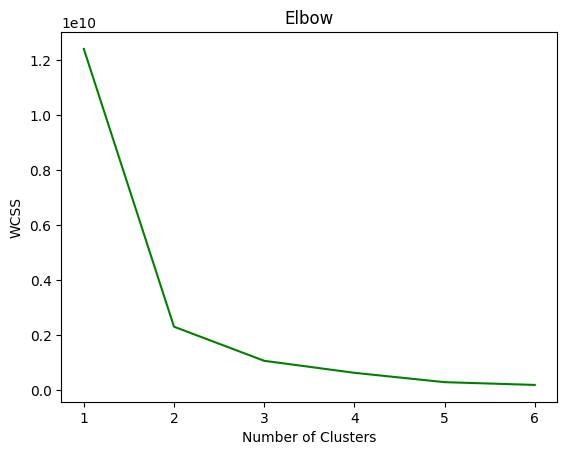

In [148]:
# elbow plot for the clusters along with the silhouette score

n_clusters = [1, 2, 3, 4, 5, 6]
kmeans_inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10, max_iter=50)
    
    # fit on the data
    predictions = kmeans.fit_predict(cluster_input)
    kmeans_inertia.append(kmeans.inertia_)
    
    if n<2:
        continue
    else:
        score = silhouette_score(X=cluster_input, labels=predictions)
        print(f'The silhouette score for {n} clusters is {score}')

# plot the elbow curve
plt.plot(n_clusters, kmeans_inertia, color='green')
plt.title('Elbow')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [149]:
# train kmeans for 2 clusters
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
pred = kmeans.fit_predict(cluster_input)

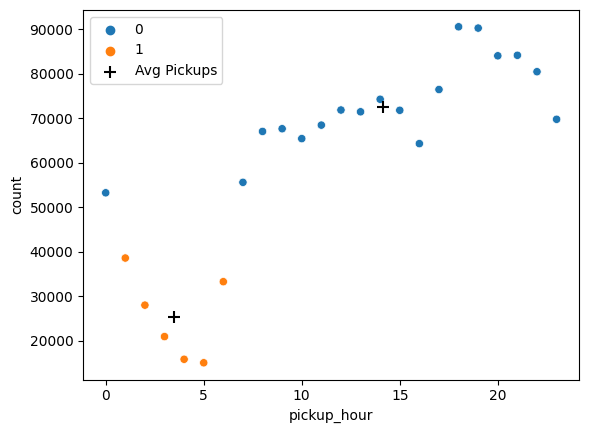

In [150]:
# the centroid of kmeans 
cluster_centroids = kmeans.cluster_centers_

# plot the scatter plot
sns.scatterplot(data=cluster_input, x='pickup_hour', y='count', hue='Cluster')
plt.scatter(cluster_centroids[:,0], cluster_centroids[:,1], marker='+', s=70, c='k', label='Avg Pickups')
plt.legend()
plt.show()

In [151]:
clusters_input = cluster_input.drop(columns='Cluster')

In [152]:
kmeans = KMeans(n_clusters=2,n_init=10,max_iter=50)
predictions = kmeans.fit_predict(clusters_input)

In [153]:
clusters_centroids = kmeans.cluster_centers_
clusters_centroids

array([[1.41666667e+01, 7.26202222e+04],
       [3.50000000e+00, 2.52466667e+04]])

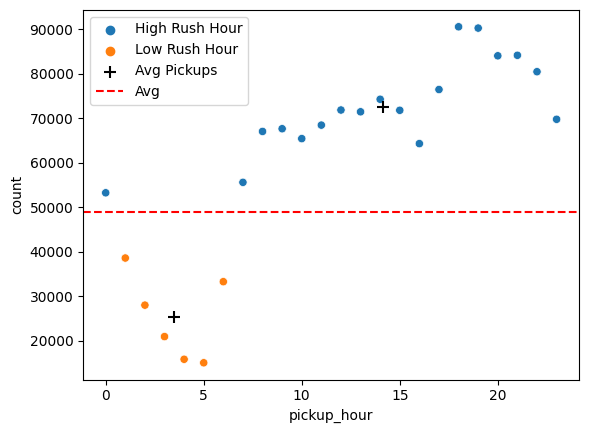

In [154]:
sns.scatterplot(data=cluster_input, x='pickup_hour', y='count',
               hue=np.where(predictions==0,'High Rush Hour', 'Low Rush Hour'))
plt.scatter(clusters_centroids[:,0], clusters_centroids[:,1], c='k', s=70, marker='+', label='Avg Pickups')
plt.axhline(y=clusters_centroids[:,1].mean(), linestyle='--', color='red', label='Avg')
plt.legend()
plt.show()

- Is the cause of deviation of pickup pattern from normal is Weekend? check it.

In [155]:
# method 1. avg pickups when the day is a weekend or not

weekend_grp = new_train_df.groupby('is_weekend')
weekend_grp['pickup_day'].value_counts().unstack().mean(axis=1)

is_weekend
0    208482.0
1    208117.0
dtype: float64

In [156]:
# method 2. avg pickups when the day is a weekend or not

weekend_grp['pickup_day'].value_counts().groupby('is_weekend').mean()

is_weekend
0    208482.0
1    208117.0
Name: count, dtype: float64

**The avg pickups are almost similar on weekdays and weekends**

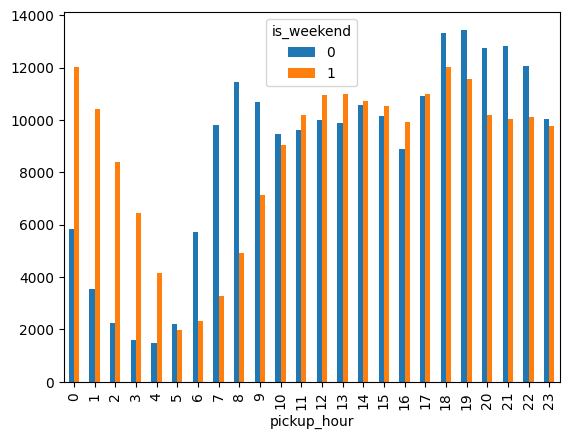

In [157]:
# pickup pattern on hour of the day for weekdays and weekends

def calculate_trips_avg_day(group):
    value_counts = group['pickup_hour'].value_counts()
    day_counts   = group['pickup_day'].nunique()
    avg_group = value_counts/day_counts
    return avg_group

weekend_grp.apply(calculate_trips_avg_day).unstack(level=0).plot(kind='bar')
plt.show()

**Observations :**
1. People on the weekends travel more at the midnight and late night hours as compare to the weekdays.
2. Cab pickup up during morning hour in weekdays but the same is not true for weekends.
3. Late evening hours rush on both the weekdays and weekends

### Pickup/Dropoff Patterns during Weekdays

In [158]:
new_train_df.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_hour                    int32
pickup_date                    int32
pickup_month                   int32
pickup_day                     int32
is_weekend                     int64
dtype: object

Text(0, 0.5, 'Longitude')

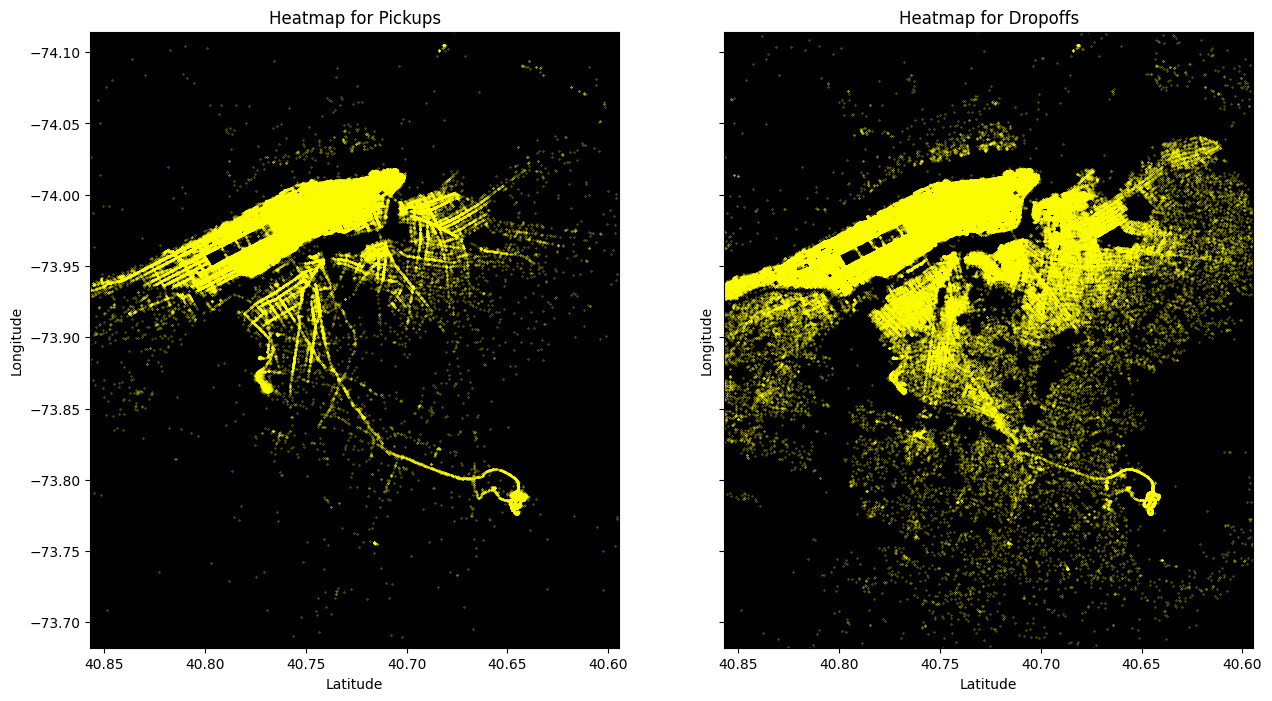

In [159]:
# heatmap of pickups and dropoffs during the weekdays
temp_df = new_train_df.loc[new_train_df['is_weekend']==0]
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 8))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df['pickup_latitude'], temp_df['pickup_longitude'], s=0.05, color='yellow')
ax[0].set_ylim(longitude_cord)
ax[0].set_xlim(latitude_cord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df['dropoff_latitude'], temp_df['dropoff_longitude'], s=0.05, color='yellow')
ax[1].set_ylim(longitude_cord)
ax[1].set_xlim(latitude_cord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

Text(0.5, 0, 'Latitude')

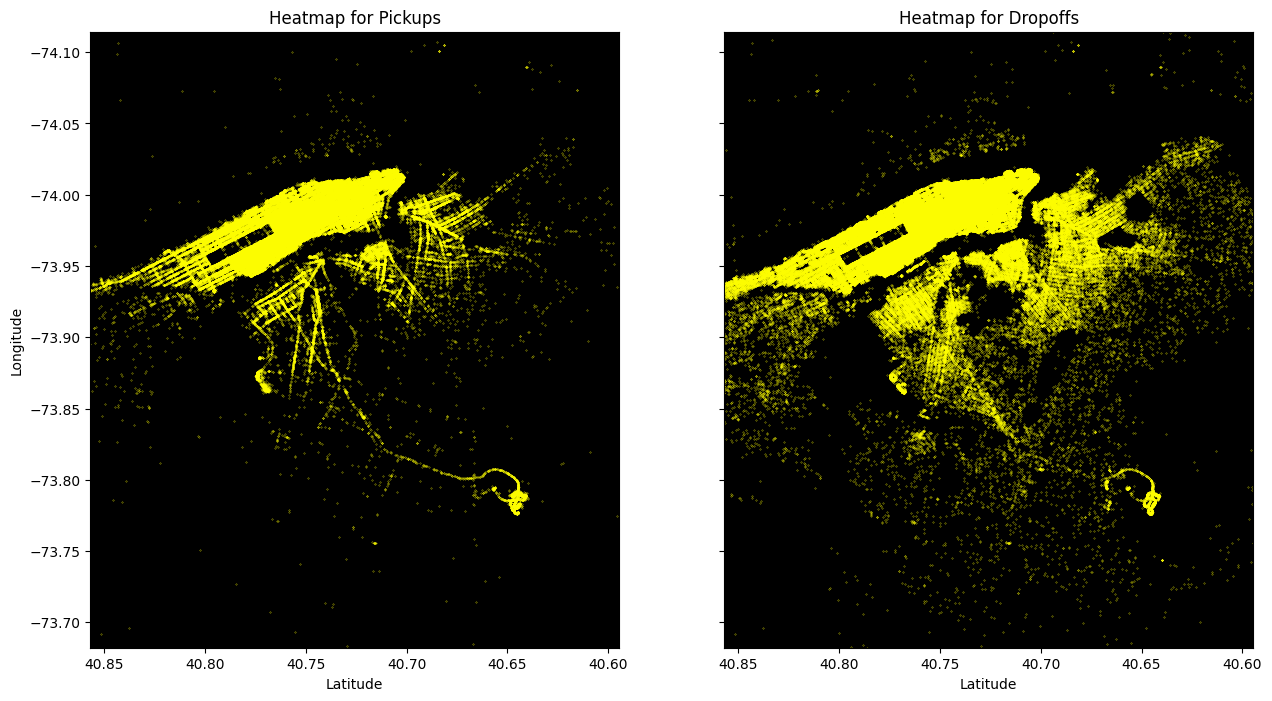

In [160]:
# heatmap of pickups and dropoffs during the weekdays
temp_df = new_train_df.loc[new_train_df['is_weekend']==1]
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 8))


ax[0].set_facecolor('k')
ax[0].scatter(temp_df['pickup_latitude'], temp_df['pickup_longitude'], s=0.05, color='yellow')
ax[0].set_ylim(longitude_cord)
ax[0].set_xlim(latitude_cord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df['dropoff_latitude'], temp_df['dropoff_longitude'], s=0.05, color='yellow')
ax[1].set_ylim(longitude_cord)
ax[1].set_xlim(latitude_cord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')


Text(0.5, 0, 'Latitude')

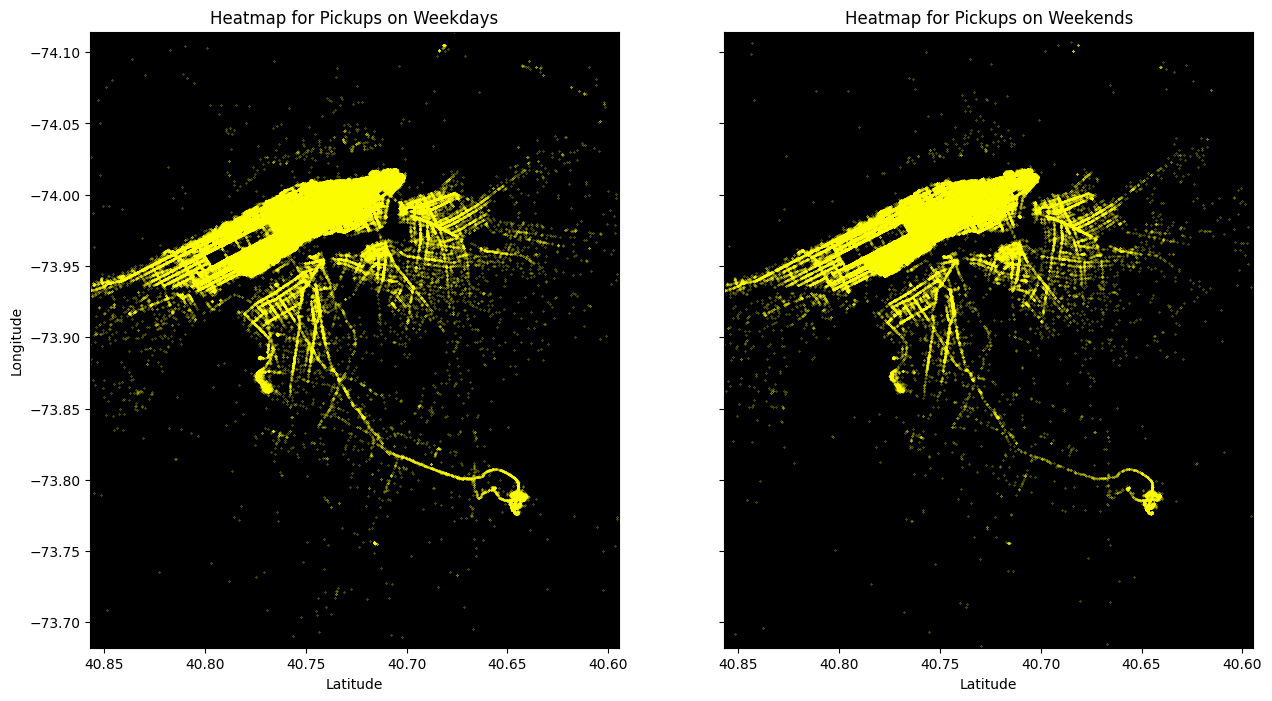

In [161]:
temp_df1 = new_train_df.loc[new_train_df['is_weekend']==0]
temp_df2 = new_train_df.loc[new_train_df['is_weekend']==1]

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 8))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df1['pickup_latitude'], temp_df1['pickup_longitude'], s=0.05, color='yellow')
ax[0].set_ylim(longitude_cord)
ax[0].set_xlim(latitude_cord)
ax[0].set_title('Heatmap for Pickups on Weekdays')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df2['pickup_latitude'], temp_df2['pickup_longitude'], s=0.05, color='yellow')
ax[1].set_ylim(longitude_cord)
ax[1].set_xlim(latitude_cord)
ax[1].set_title('Heatmap for Pickups on Weekends')
ax[1].set_xlabel('Latitude')

Text(0.5, 0, 'Latitude')

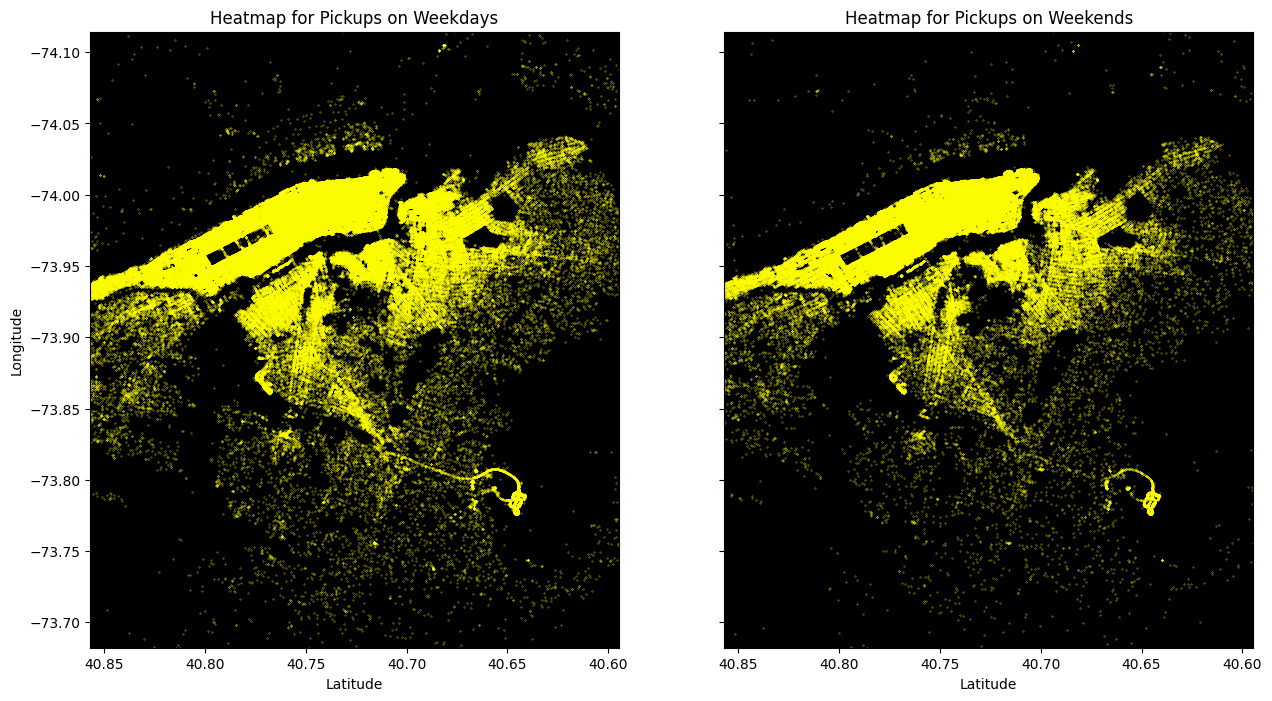

In [162]:
temp_df1 = new_train_df.loc[new_train_df['is_weekend']==0]
temp_df2 = new_train_df.loc[new_train_df['is_weekend']==1]

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 8))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df1['dropoff_latitude'], temp_df1['dropoff_longitude'], s=0.05, color='yellow')
ax[0].set_ylim(longitude_cord)
ax[0].set_xlim(latitude_cord)
ax[0].set_title('Heatmap for Pickups on Weekdays')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df2['dropoff_latitude'], temp_df2['dropoff_longitude'], s=0.05, color='yellow')
ax[1].set_ylim(longitude_cord)
ax[1].set_xlim(latitude_cord)
ax[1].set_title('Heatmap for Pickups on Weekends')
ax[1].set_xlabel('Latitude')

# Pickup & Drop

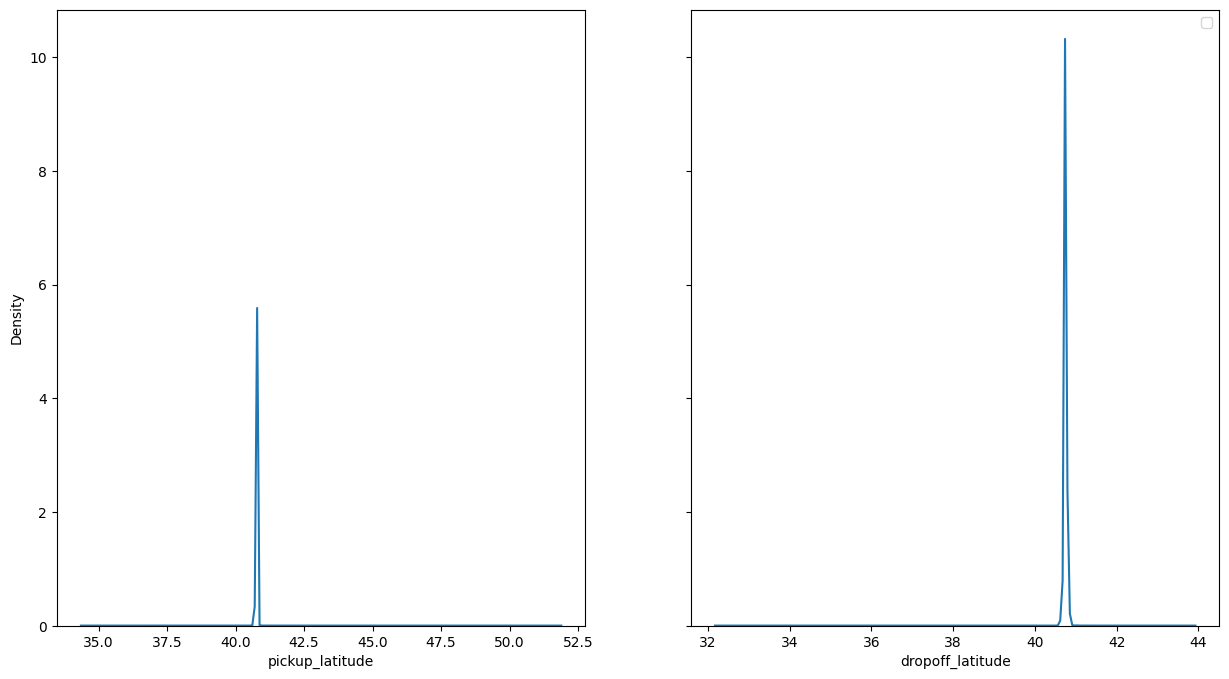

In [163]:
# distribution of the column
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 8))
sns.kdeplot(new_train_df['pickup_latitude'], ax=ax[0])
sns.kdeplot(new_train_df['dropoff_latitude'], ax=ax[1])
plt.legend()
plt.show()

- There are considerable outliers on the both sides of the distribution

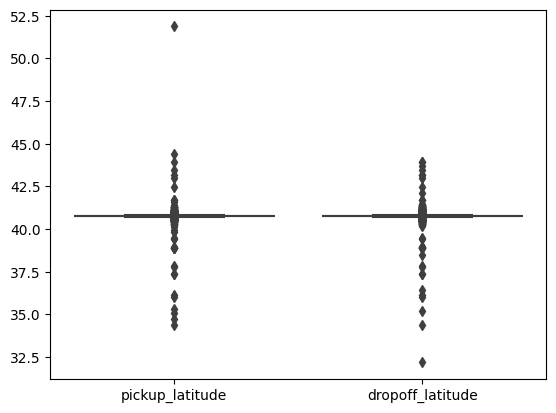

In [164]:
# boxplots

sns.boxplot(new_train_df[['pickup_latitude', 'dropoff_latitude']])
plt.show()

In [165]:
# get the min, max, median and mean values
new_train_df[['pickup_latitude', 'dropoff_latitude']].agg(['min', 'max', 'mean', 'median', 'std'])

,pickup_latitude,dropoff_latitude
min,34.359695,32.181141
max,51.881084,43.921028
mean,40.750921,40.751800
median,40.754101,40.754524
std,0.032881,0.035891


# Outlier detection
### method 1. using IQR approach

In [166]:
def find_lost_size(old_df, new_df):
    old_df_shape = old_df.shape
    new_df_shape = new_df.shape
    percentage_change = ((old_df_shape[0]-new_df_shape[0])/old_df_shape[0])*100
    print(f'The shape of old dataframe is {old_df_shape}')
    print(f'The shape of new dataframe is {new_df_shape}')
    print(f'Total lost Rows {old_df_shape[0]-new_df_shape[0]}')
    print(f'The percentage of outliers removed are {percentage_change:.2f}')

In [167]:
def remove_outliers(dataframe,column_names,fold=1.5):
    filtered_df = dataframe.copy()
    for column_name in column_names:
        Q1, Q3 = dataframe[column_name].quantile([0.25,0.75])
        IQR = Q3 - Q1
        upper_bound = Q3 + (fold*IQR)
        lower_bound = Q1 - (fold*IQR)
        filtered_df = filtered_df.loc[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound),:].copy()
    find_lost_size(old_df=dataframe,new_df=filtered_df)
    return filtered_df.head()

In [168]:
data_without_outliers = remove_outliers(new_train_df, column_names=['pickup_latitude', 'dropoff_latitude', 'pickup_longitude', 'dropoff_longitude'],fold=3)

The shape of old dataframe is (1458644, 15)
The shape of new dataframe is (1341137, 15)
Total lost Rows 117507
The percentage of outliers removed are 8.06


**Even if the fold size is kept to 3, around 8 percent of the rows are removed**
- This is huge loss of training data

In [169]:
# test the normality of columns
from scipy.stats import jarque_bera
def test_for_normality(data, column_name):
    alpha=0.05
    _, p_val = jarque_bera(data[column_name].values)
    
    if p_val>=alpha:
        print(f'Fail to reject the H_0',f'Means the {column_name} is normally distributed')
    else:
        print(f'Reject the H_0. Means {column_name} is not normally distributed.')

In [170]:
cols_to_test_for_normality = new_train_df.columns[4:8]
for col in cols_to_test_for_normality:
    test_for_normality(new_train_df, col)
    print('*'*100, end='\n')

Reject the H_0. Means pickup_longitude is not normally distributed.
****************************************************************************************************
Reject the H_0. Means pickup_latitude is not normally distributed.
****************************************************************************************************
Reject the H_0. Means dropoff_longitude is not normally distributed.
****************************************************************************************************
Reject the H_0. Means dropoff_latitude is not normally distributed.
****************************************************************************************************


In [171]:
cols_to_test_for_normality

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

### **Testing the distribution after 8% of the data is removed(only test)**

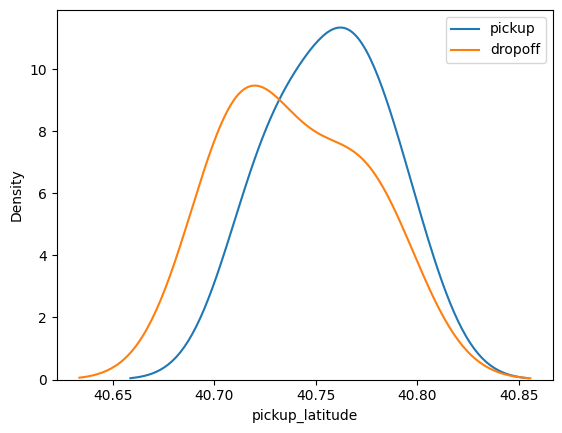

In [172]:
# distribution of column
sns.kdeplot(data_without_outliers['pickup_latitude'], label='pickup')
sns.kdeplot(data_without_outliers['dropoff_latitude'], label='dropoff')
plt.legend()
plt.show()

data_without_outliers['pickup_latitude']- NO, one is distributed normally

In [173]:
data_without_outliers['pickup_latitude'].skew()

-0.09772501160593786

In [174]:
data_without_outliers['dropoff_latitude'].skew()

0.43590694817636966

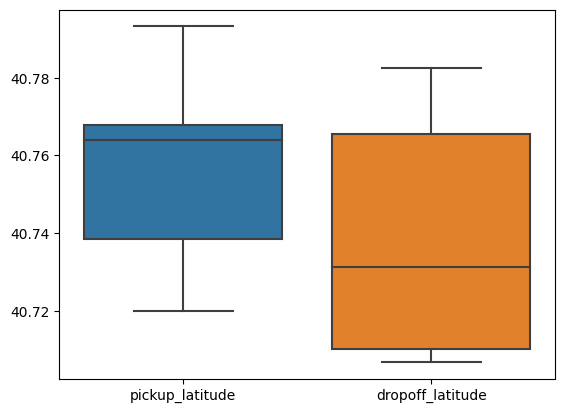

In [175]:
# boxplot
sns.boxplot(data_without_outliers[['pickup_latitude', 'dropoff_latitude']])
plt.show()

## **Pickups & DropOff longitude**

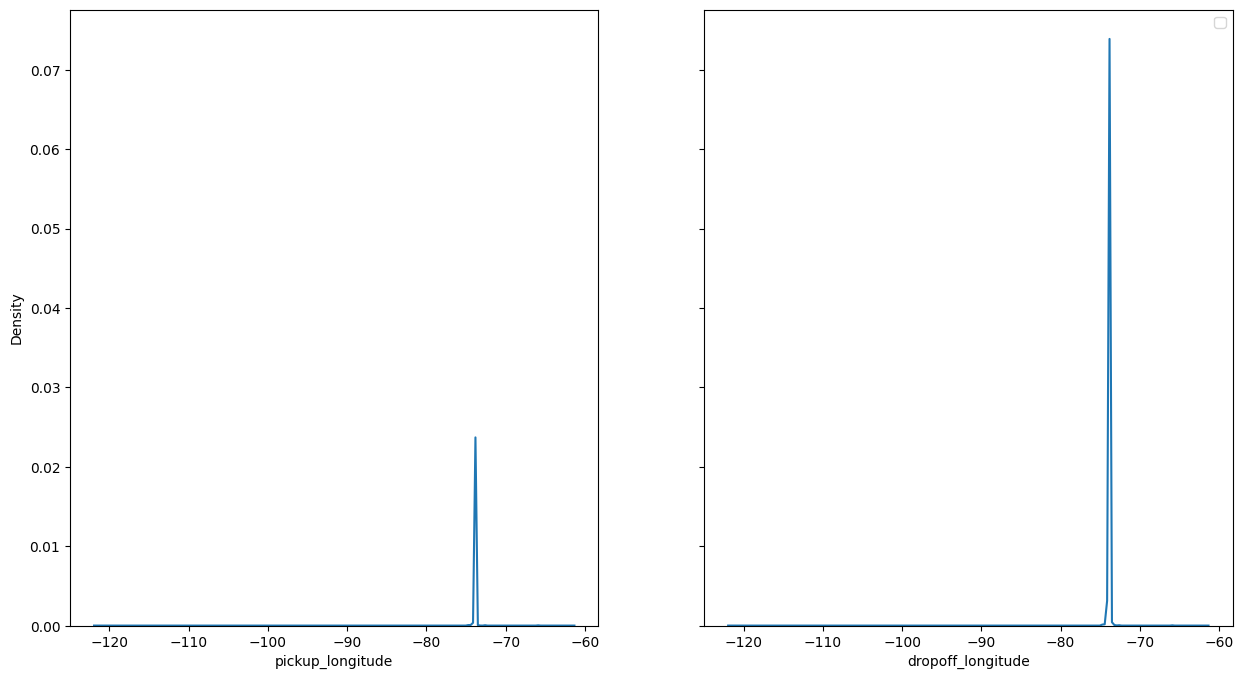

In [176]:
# sns.kdeplot(new_train_df['pickup_longitude'], label='pickup')
# distribution of the column
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 8))
sns.kdeplot(new_train_df['pickup_longitude'], ax=ax[0])
sns.kdeplot(new_train_df['dropoff_longitude'], ax=ax[1])
plt.legend()
plt.show()

- Highly skewed

In [177]:
data_without_outliers['pickup_longitude'].skew()

-1.910595089480357

In [178]:
data_without_outliers['dropoff_longitude'].skew()

0.485807989750931

<Axes: >

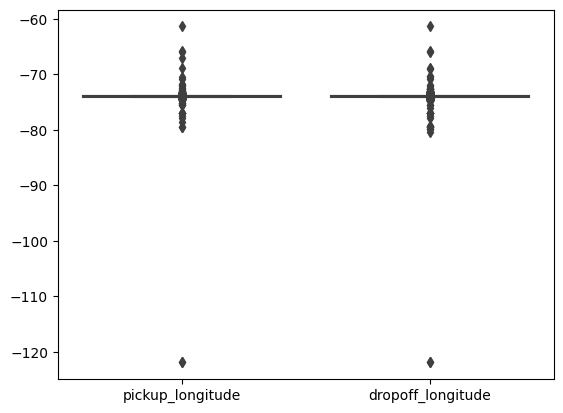

In [179]:
# plot boxplots
sns.boxplot(new_train_df[['pickup_longitude', 'dropoff_longitude']])

In [180]:
new_train_df[['pickup_longitude', 'dropoff_longitude']].agg(['min','max', 'mean','median'])

,pickup_longitude,dropoff_longitude
min,-121.933342,-121.933304
max,-61.335529,-61.335529
mean,-73.973486,-73.973416
median,-73.981743,-73.979752


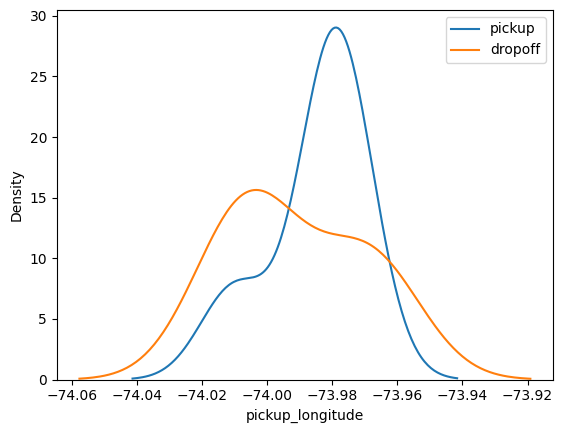

In [181]:
sns.kdeplot(data_without_outliers['pickup_longitude'],label='pickup')
sns.kdeplot(data_without_outliers['dropoff_longitude'],label='dropoff')
plt.legend()
plt.show()

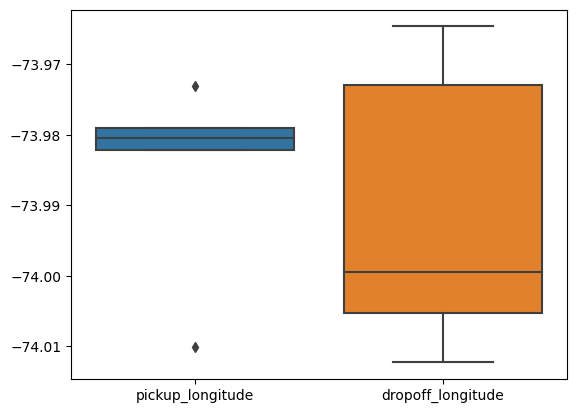

In [182]:
# plot boxplots

sns.boxplot(data_without_outliers[['pickup_longitude','dropoff_longitude']])
plt.show()

### method 2. percentile approach

In [183]:
new_train_df.columns[4:8]

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [184]:
def plot_boxplot(data, columns):
    div, rem = divmod(len(columns), 2)
    number_of_rows = div+rem
    number_of_cols = 2
    fig = plt.figure(figsize=(15, 8))
    for ind, col in enumerate(columns):
        plt.subplot(number_of_rows, number_of_cols, ind+1)
        sns.boxplot(data=data, y=col, whis=3)
        plt.tight_layout()
    plt.show()

In [185]:
def plot_kdeplots(data, columns):
    div, rem = divmod(len(columns),2)
    number_of_rows = div+row
    number_of_cols = 2
    fig = plt.figure(figsize=(15, 8))
    for ind, col in enumerate(columns):
        plt.subplot(number_of_rows, numebr_of_cols, ind+1)
        sns.kdeplot(data=data, x=col)
        plt.tight_layout()
    plt.show()

In [186]:
normal_duration_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,7.250000


In [187]:
normal_duration_df['trip_duration'].max()

99.98333333333333

In [188]:
normal_duration_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [189]:
normal_subset = normal_duration_df.iloc[:,5:9]

In [190]:
latitude_cols = normal_duration_df.columns[normal_duration_df.columns.str.contains('latitude')]
longitude_cols= normal_duration_df.columns[normal_duration_df.columns.str.contains('longitude')]

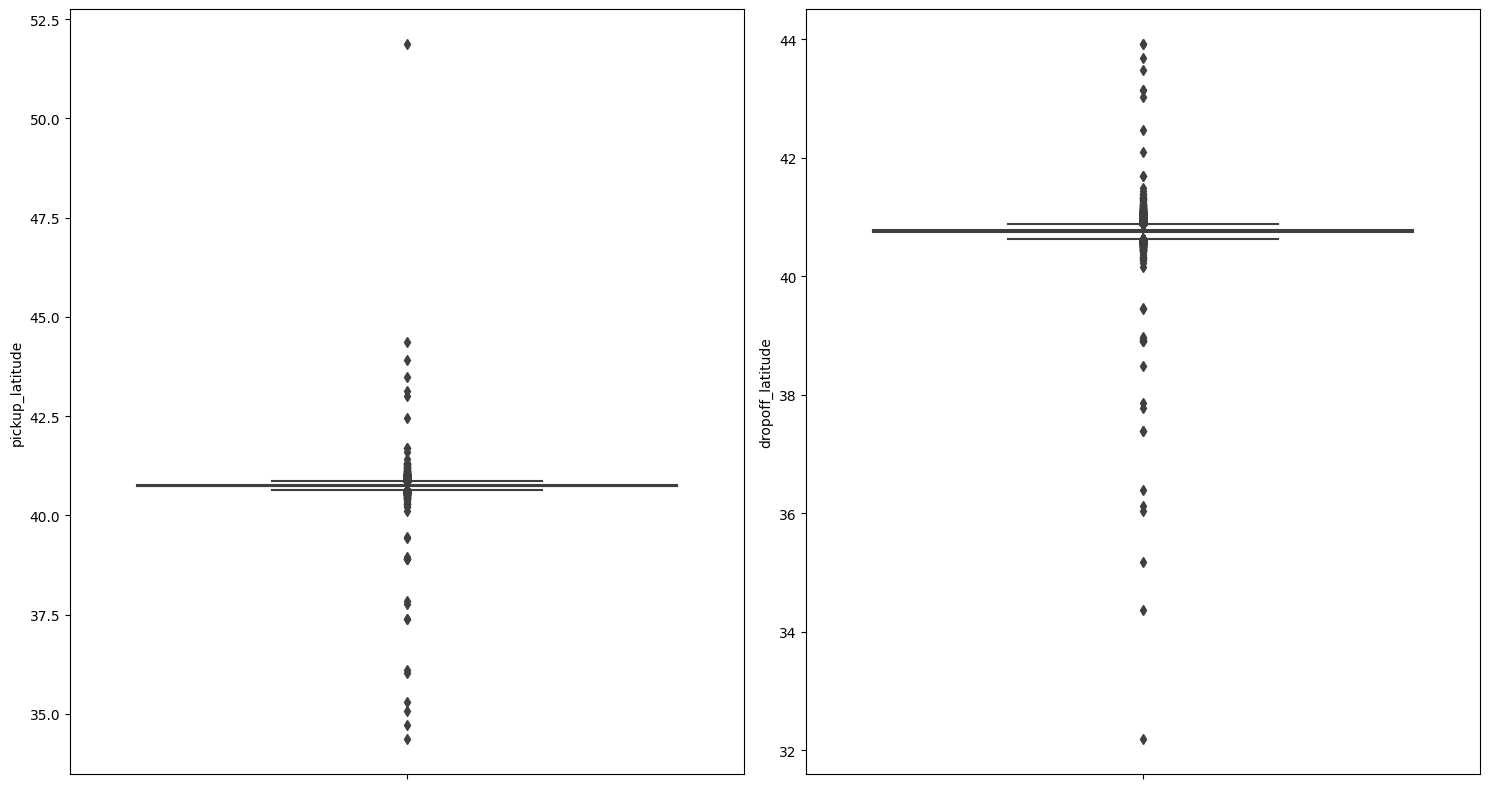

In [191]:
# boxplots for latitude cols
plot_boxplot(normal_subset, latitude_cols)

In [192]:
normal_duration_df[normal_duration_df['pickup_latitude']>=50]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,13.2


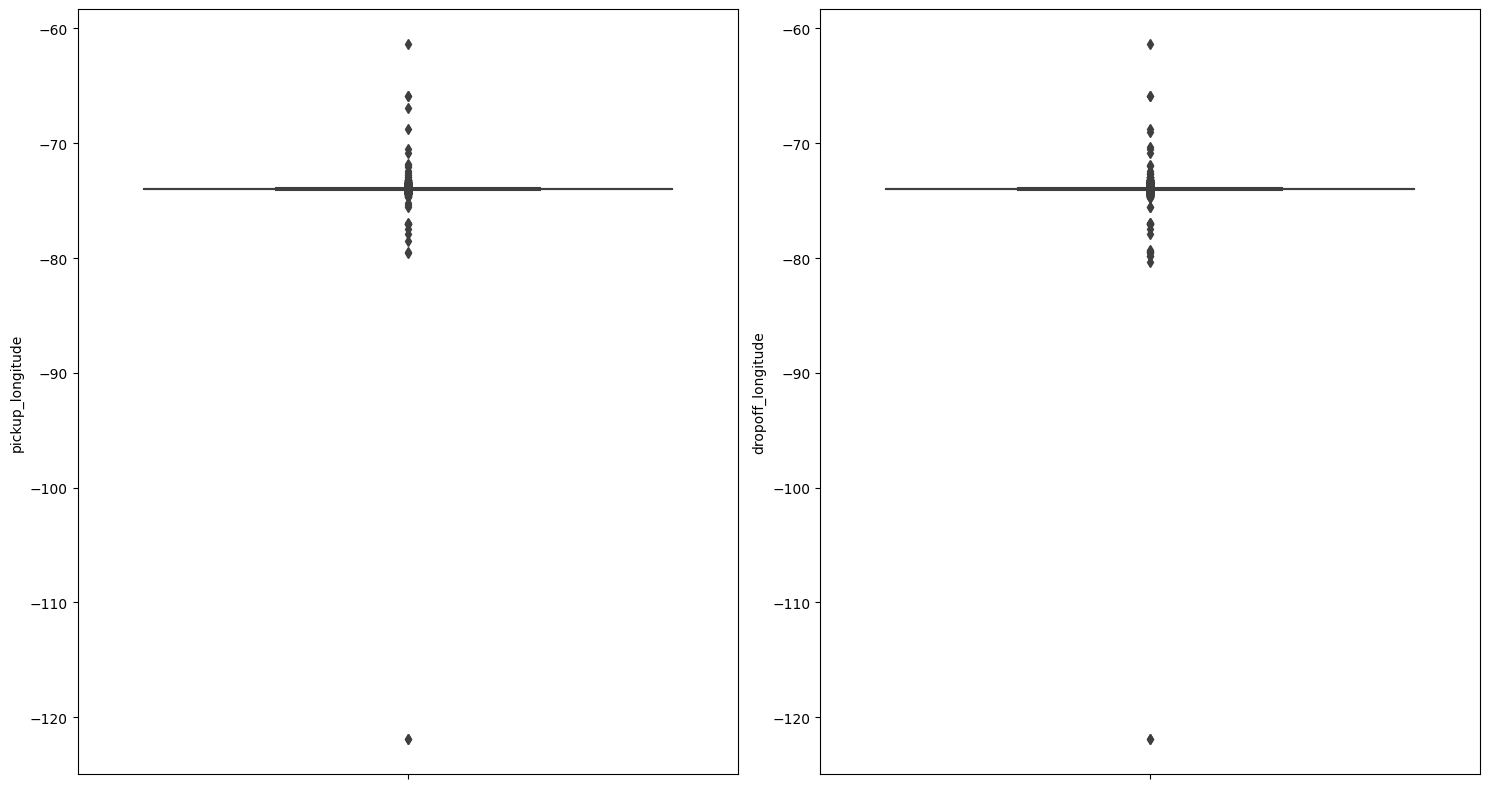

In [193]:
# boxplot for longitude cols
plot_boxplot(normal_subset, longitude_cols)

In [194]:
new_df = remove_outliers(normal_subset, normal_subset.columns.to_list(), fold=1.5)

The shape of old dataframe is (1456077, 4)
The shape of new dataframe is (1265909, 4)
Total lost Rows 190168
The percentage of outliers removed are 13.06


In [195]:
new_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.982155,40.767937,-73.964630,40.765602
1,-73.980415,40.738564,-73.999481,40.731152
2,-73.979027,40.763939,-74.005333,40.710087
3,-74.010040,40.719971,-74.012268,40.706718
4,-73.973053,40.793209,-73.972923,40.782520


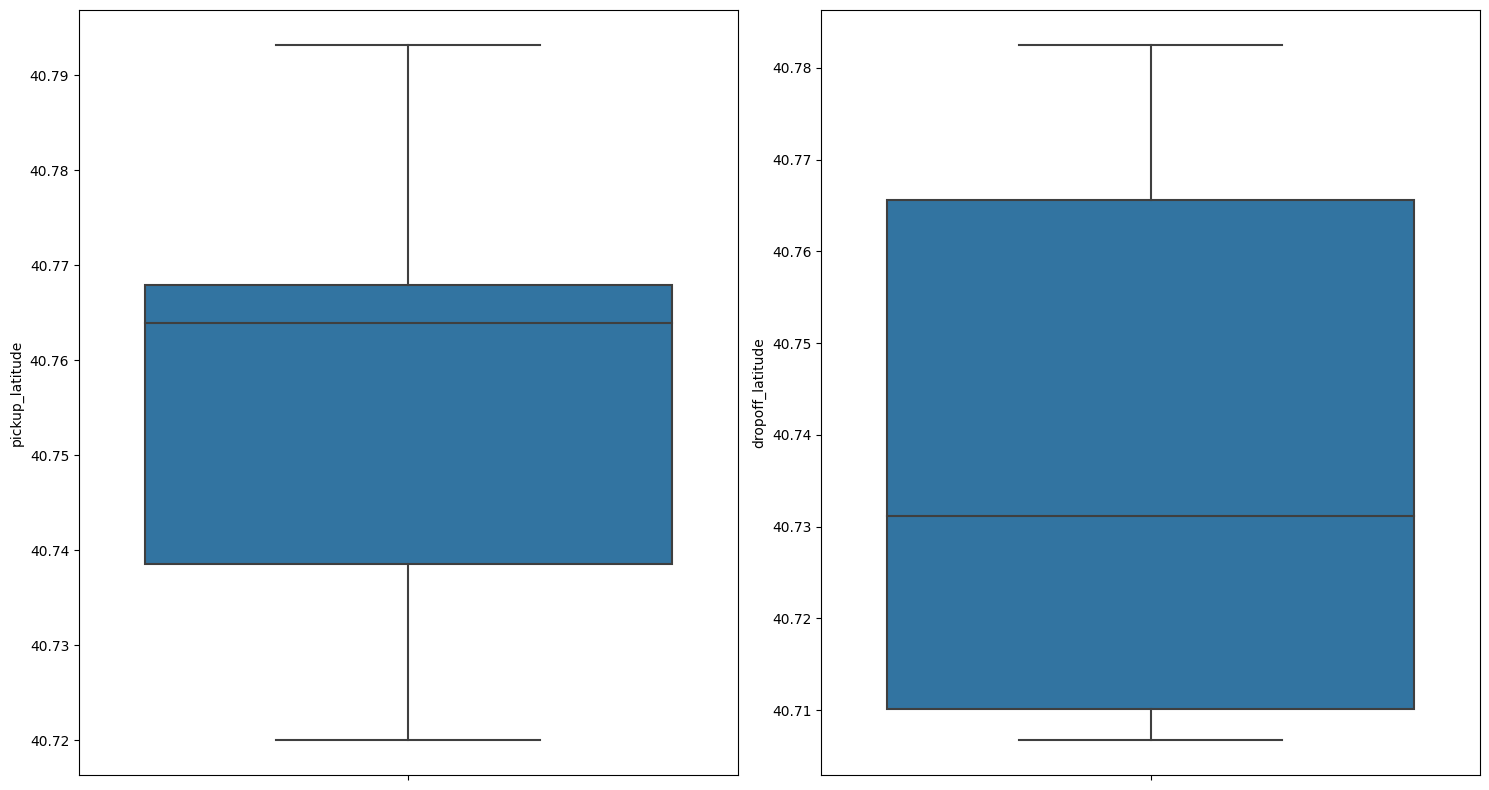

In [196]:
plot_boxplot(new_df, latitude_cols)

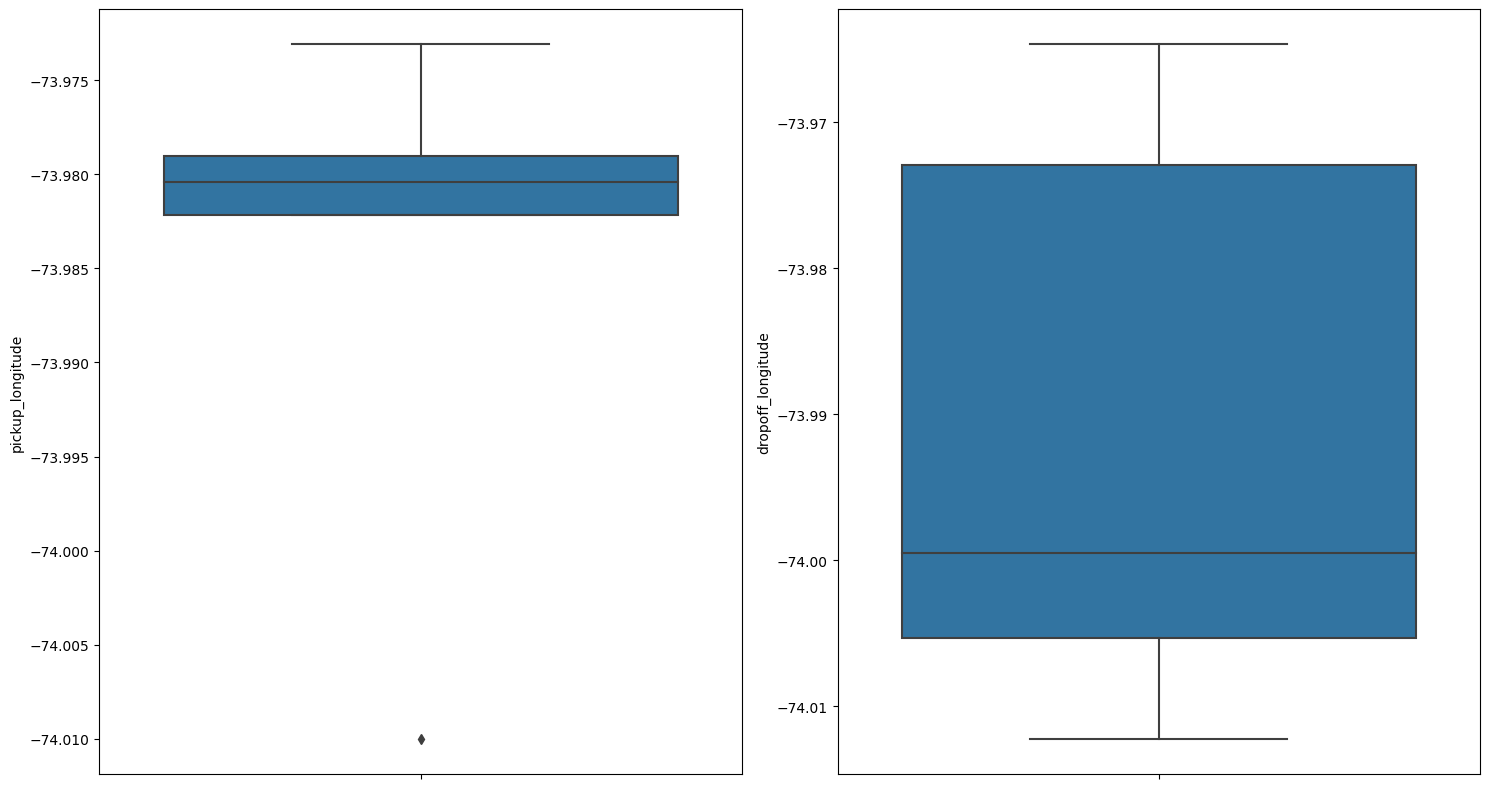

In [197]:
plot_boxplot(new_df, longitude_cols)

In [198]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [199]:
from feature_engine.outliers import OutlierTrimmer
trimmer = OutlierTrimmer(capping_method='quantiles', tail='both', fold=0.005, 
                        variables=normal_subset.columns.to_list())

# remove the outliers
data_without_outliers = trimmer.fit_transform(normal_duration_df)

In [200]:
find_lost_size(normal_duration_df, data_without_outliers)

The shape of old dataframe is (1456077, 11)
The shape of new dataframe is (1404925, 11)
Total lost Rows 51152
The percentage of outliers removed are 3.51


In [201]:
trimmer.left_tail_caps_

{'pickup_longitude': -74.0157699584961,
 'pickup_latitude': 40.6444091796875,
 'dropoff_longitude': -74.0172348022461,
 'dropoff_latitude': 40.64195251464844}

In [202]:
trimmer.right_tail_caps_

{'pickup_longitude': -73.78096771240233,
 'pickup_latitude': 40.815391540527344,
 'dropoff_longitude': -73.78289794921875,
 'dropoff_latitude': 40.8541283416748}

In [203]:
normal_subset.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

## **Statistical summary of trip duration before and after outlier detections**

In [204]:
normal_subset.quantile([0.001, 0.999])

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0.001,-74.017220,40.641510,-74.177605,40.604317
0.999,-73.776688,40.842444,-73.740190,40.889462


In [205]:
# statistical summary of trip_duration without removal of outliers
summary_original = normal_duration_df['trip_duration'].agg(['min', 'max','median', 'mean'])
summary_original.name = 'before_removal'
summary_original

min        0.016667
max       99.983333
median    11.016667
mean      13.914414
Name: before_removal, dtype: float64

In [206]:
# distribution of passenger count before outliers removal
normal_duration_df['passenger_count'].value_counts()

passenger_count
1    1031963
2     209917
5      77849
3      59759
6      48190
4      28335
0         59
7          3
9          1
8          1
Name: count, dtype: int64

In [207]:
# statistical summary of trip_duration after outlier detections
summary_after_outlier_removal = data_without_outliers['trip_duration'].agg(['min', 'max', 'median', 'mean'])
summary_after_outlier_removal.name = 'after_removal'
summary_after_outlier_removal

min        0.016667
max       99.966667
median    10.783333
mean      13.359979
Name: after_removal, dtype: float64

In [208]:
df_after_removal = pd.concat([summary_original, summary_after_outlier_removal], axis=1)

In [209]:
df_after_removal.head()

,before_removal,after_removal
min,0.016667,0.016667
max,99.983333,99.966667
median,11.016667,10.783333
mean,13.914414,13.359979


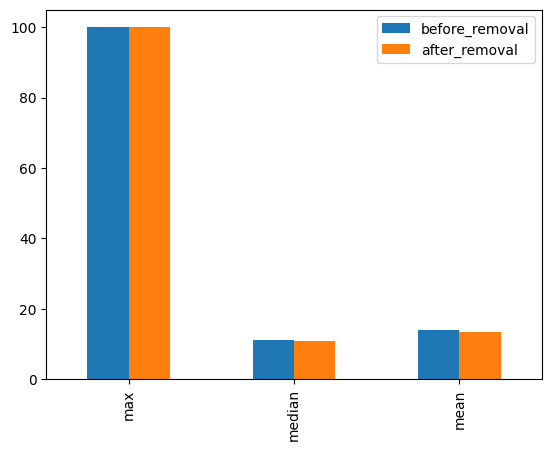

In [210]:
df_after_removal.iloc[1:, :].plot(kind='bar')
plt.show()

**The difference b/w the data before and after removal of outliers is not that consequential**
- then its better to remove those points.

In [211]:
# distribution of passenger count after removal of outliers
data_without_outliers['passenger_count'].value_counts()

passenger_count
1    996646
2    201701
5     75131
3     57581
6     46584
4     27233
0        49
Name: count, dtype: int64

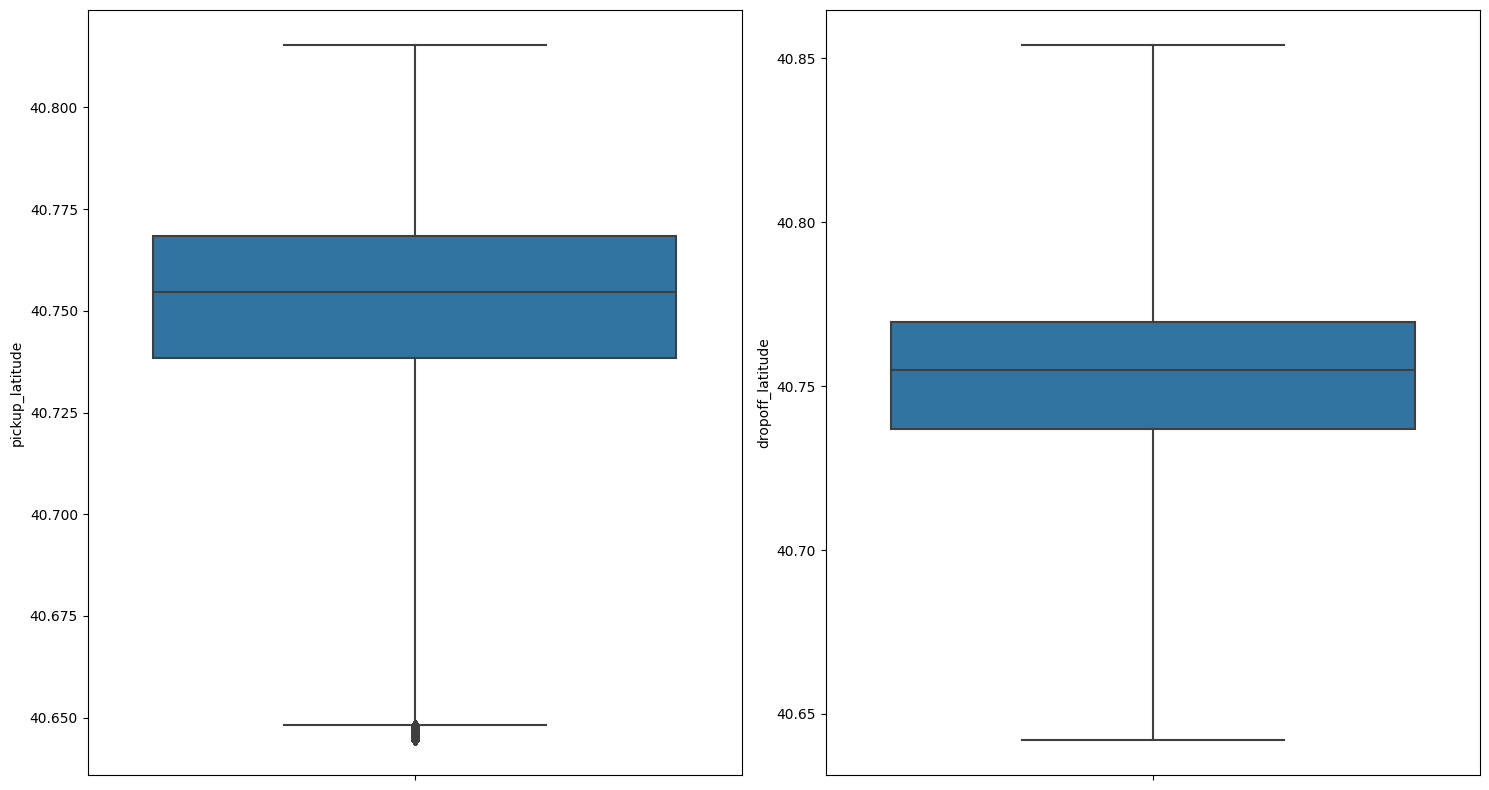

In [212]:
# boxplot for latitude columns
plot_boxplot(data_without_outliers, latitude_cols)

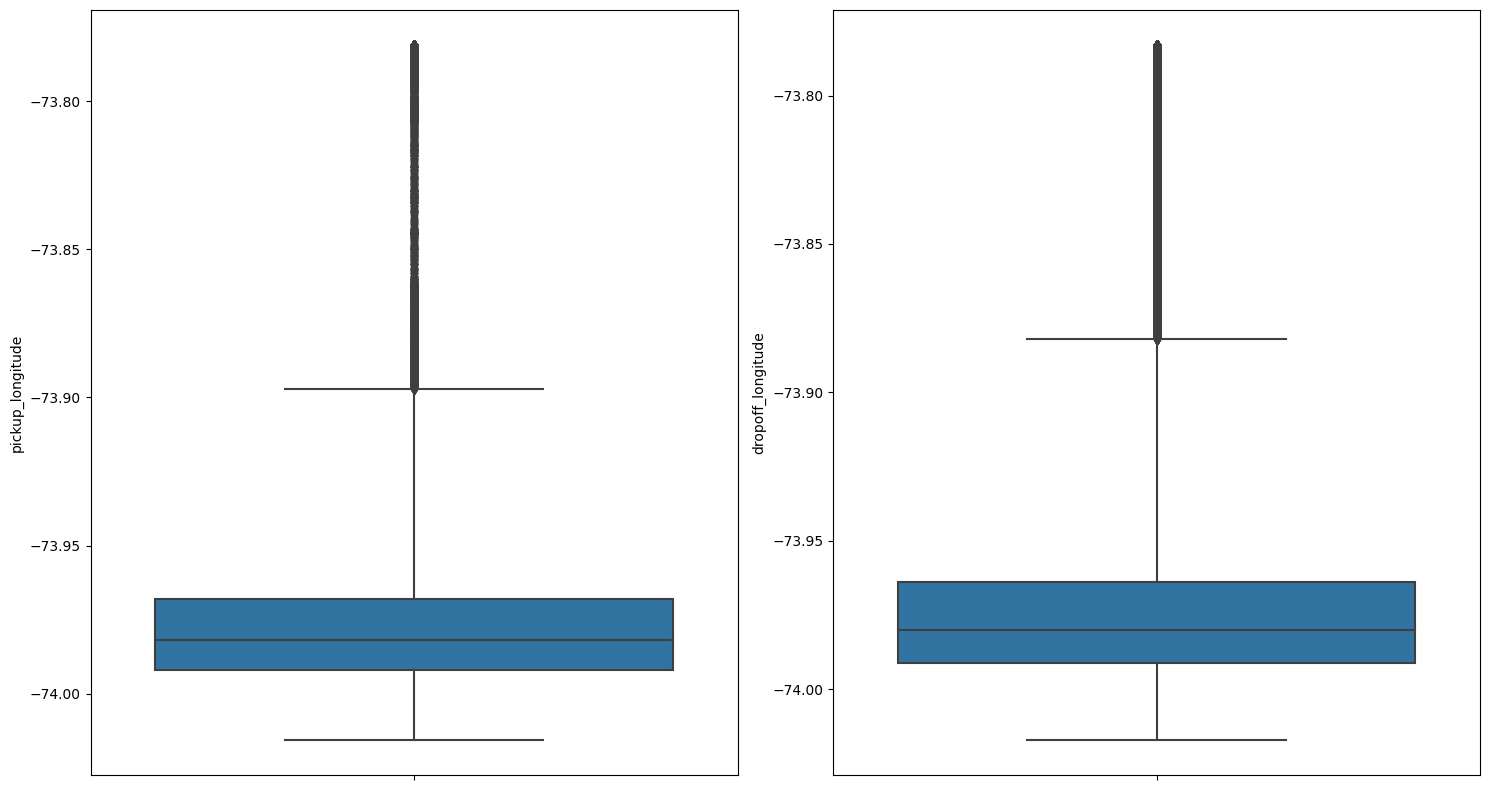

In [213]:
# boxplot for longitude columns
plot_boxplot(data_without_outliers, longitude_cols)

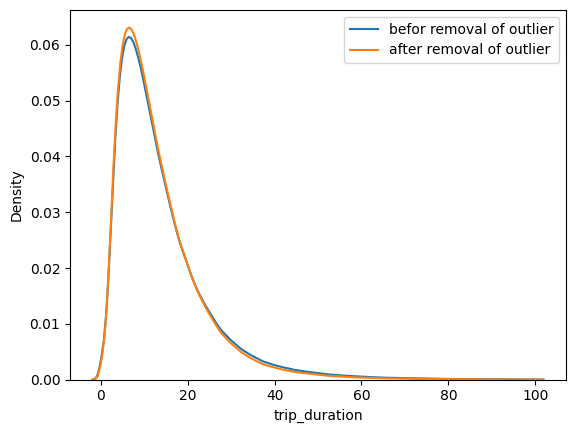

In [214]:
# distribution of output columns before and after removal of outliers
# fig, ax=plt.subplots(1, 2, figsize=(10,6))
sns.kdeplot(data=normal_duration_df, x='trip_duration', label='befor removal of outlier')
sns.kdeplot(data=data_without_outliers, x='trip_duration', label='after removal of outlier')
plt.legend()
plt.show()

**Distribution of data before and after removal of outliers are almost same**

In [215]:
from sklearn.preprocessing import PowerTransformer

In [216]:
latitude_cols.to_list()+longitude_cols.to_list()

['pickup_latitude',
 'dropoff_latitude',
 'pickup_longitude',
 'dropoff_longitude']

In [217]:
data_without_outliers[normal_subset.columns].agg(['min','max','mean','median'])

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
min,-74.015770,40.644409,-74.017235,40.641953
max,-73.780968,40.815392,-73.782898,40.854126
mean,-73.975505,40.751960,-73.974536,40.752388
median,-73.981911,40.754551,-73.979980,40.754810


In [218]:
data_without_outliers.loc[(data_without_outliers['pickup_latitude'] == data_without_outliers['pickup_latitude'].min()),:].shape


(16, 11)

In [219]:
!mkdir /kaggle/working/final_data

In [220]:
data_without_outliers.to_csv('/kaggle/working/final_data/train.csv')

In [221]:
final_df = data_without_outliers.copy()

In [222]:
final_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,7.250000


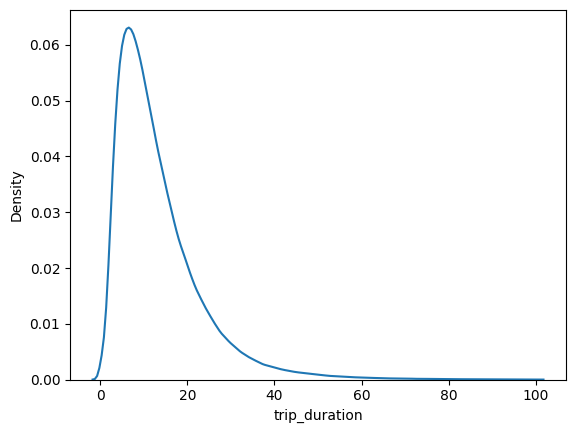

In [223]:
# kde plot for the target columns
sns.kdeplot(data=final_df, x='trip_duration')
plt.show()

<Axes: ylabel='Density'>

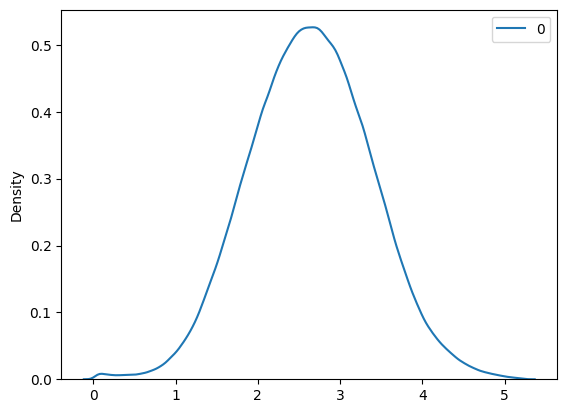

In [224]:
pt = PowerTransformer(standardize=False)
trip_duration_trans = pt.fit_transform(final_df[['trip_duration']])
sns.kdeplot(trip_duration_trans)

In [225]:
from scipy.stats import skew


In [226]:
skew(trip_duration_trans)[0] # method 1
# pd.DataFrame(trip_duration_trans,columns=['target']).skew() -> methode 2

0.00039672721663136886

- Skewness is belongs to (-0.05 to 0.05) range that represent distribution almost normal

In [227]:
np.mean(trip_duration_trans), np.std(trip_duration_trans)

(2.638671003765429, 0.7422509714189417)

# **Passenger Count**

In [228]:
# value counts in the data
final_df['passenger_count'].value_counts()

passenger_count
1    996646
2    201701
5     75131
3     57581
6     46584
4     27233
0        49
Name: count, dtype: int64

In [229]:
final_df.loc[final_df['passenger_count']==0, 'trip_duration'].agg(['min','max','mean', 'median', 'std'])

min        0.016667
max       54.050000
mean       4.681973
median     0.366667
std       11.085938
Name: trip_duration, dtype: float64

##### **The high std in the data shows a lot of variation in trip timings when there were no passengers in the cab**

In [230]:
final_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,7.250000


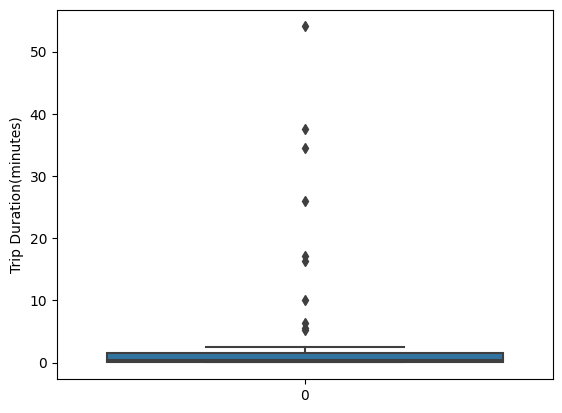

In [231]:
# box plot of trip duration when 0 passenger in cab
sns.boxplot(final_df.loc[final_df['passenger_count']==0, 'trip_duration'].reset_index(drop=True))
plt.ylabel('Trip Duration(minutes)')
plt.show()

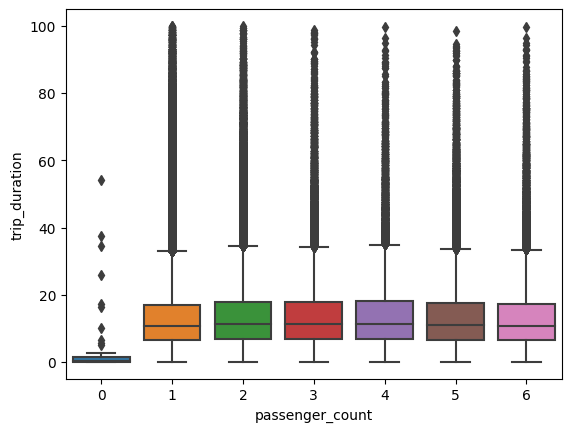

In [232]:
# plot for all passengers
sns.boxplot(data=final_df, x='passenger_count', y='trip_duration')
plt.show()

**The distribution of O passenger count is different from all others**

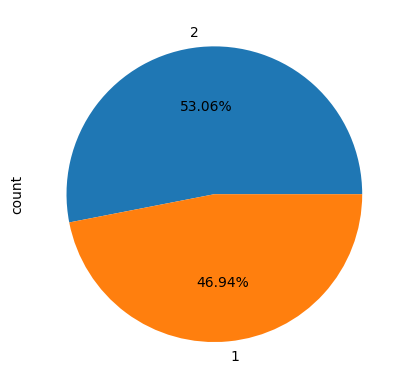

In [233]:
# pie plot of vendor_id when passenger in cab is 0
final_df.loc[(final_df['passenger_count']==0), 'vendor_id'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

**Almost equal distribution of vendors for 0 passengers**

**Equal Distrubution of the vendor when zero passenger in cab**

In [234]:
from scipy.stats import levene, f_oneway

# test for homoscedasticity or similar variances
arr_count_1 = final_df.loc[(final_df['passenger_count']==1), 'trip_duration'].values
arr_count_2 = final_df.loc[(final_df['passenger_count']==2), 'trip_duration'].values
arr_count_3 = final_df.loc[(final_df['passenger_count']==3), 'trip_duration'].values
arr_count_4 = final_df.loc[(final_df['passenger_count']==4), 'trip_duration'].values
arr_count_5 = final_df.loc[(final_df['passenger_count']==5), 'trip_duration'].values
arr_count_6 = final_df.loc[(final_df['passenger_count']==6), 'trip_duration'].values


lev_stats, lev_p_val = levene(arr_count_1, arr_count_2, arr_count_3, arr_count_4, arr_count_5, arr_count_6)
alpha = 0.05

print(lev_p_val)

if lev_p_val > alpha:
    print('Fail to reject H0, The variance of samples are similar to each other')
else:
    print('Reject the H0, The variance of atleast one sample are not equal to other samples')

2.6149915578944914e-94
Reject the H0, The variance of atleast one sample are not equal to other samples


**ANOVA test cannot be performed because the relationship is hetroscedasticity in nature or having unequal variances**
1. that's we can't possibly explain why trips were recorded when no passengers in cab
2. Only a small percent of data avialable for testing

In [235]:
# std of trip duration based on passenger count 
final_df.groupby('passenger_count')['trip_duration'].std()

passenger_count
0    11.085938
1     9.871797
2    10.483448
3    10.229039
4    10.594167
5    10.098557
6    10.039049
Name: trip_duration, dtype: float64

In [236]:
final_df.shape[0]

1404925

# **Stor and Fwd Flag**

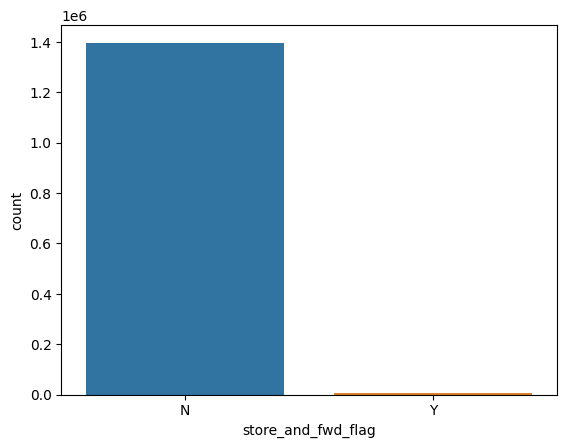

In [237]:
# distribution of column
sns.countplot(data=final_df, x='store_and_fwd_flag')
plt.show()

**This column is highly imbalanced**
> Removal of this column is good idea

In [238]:
# percentage distributions
final_df['store_and_fwd_flag'].value_counts(normalize=True)*100

store_and_fwd_flag
N    99.463815
Y     0.536185
Name: proportion, dtype: float64

<Axes: >

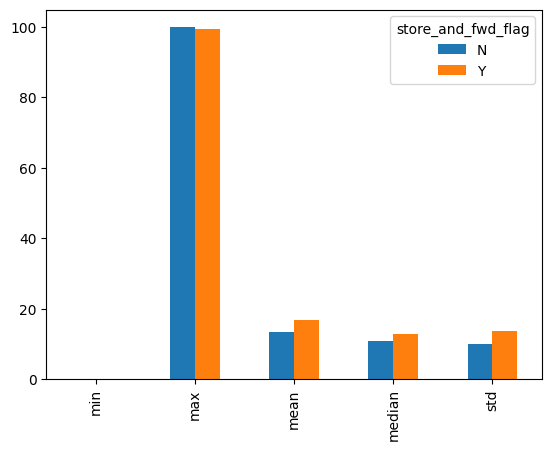

In [239]:
# statistical summary of this with target(trip_duration)
final_df.groupby('store_and_fwd_flag')['trip_duration'].agg(['min','max','mean','median','std']).T.plot(kind='bar')

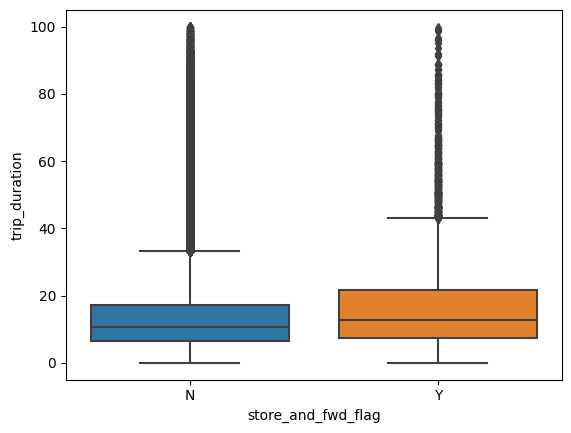

In [240]:
# plot boxplots

sns.boxplot(data=final_df,x='store_and_fwd_flag',y='trip_duration')
plt.show()